In [3]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns # for making plots with seaborn
color = sns.color_palette("rainbow_r")
import matplotlib.style
plt.style.use('seaborn')
import sklearn.metrics as metrics
import os
import warnings
warnings.filterwarnings("ignore")

In [4]:
df = pd.read_excel('NBFC Loan Transaction Data.xlsx')
df.head().T

,0,1,2,3,4
AGREEMENTID,11220001,11220002,11220006,11220008,11220010
AUTHORIZATIONDATE,2010-08-29 00:00:00,2010-09-15 00:00:00,2010-11-02 00:00:00,2010-10-06 00:00:00,2010-10-26 00:00:00
BALANCE_EXCESS,0,0,0,0,0
BALANCE_TENURE,0,99,231,0,215
CITY,MUMBAI,MUMBAI,MUMBAI,THANE,MUMBAI
COMPLETED_TENURE,45,38,81,91,89
CURRENT_INTEREST_RATE,13.4219,13.7341,15.6069,11.237,14.9826
CURRENT_INTEREST_RATE_MAX,13.7341,13.7341,16.2312,13.7341,15.6069
CURRENT_INTEREST_RATE_MIN,13.4219,13.7341,15.6069,11.237,14.9826
CURRENT_INTEREST_RATE_CHANGES,1,0,2,4,2


In [5]:
print('The number of rows (observations) is',df.shape[0],'\n''The number of columns (variables) is',df.shape[1])

The number of rows (observations) is 20012 
The number of columns (variables) is 53


In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20012 entries, 0 to 20011
Data columns (total 53 columns):
 #   Column                               Non-Null Count  Dtype         
---  ------                               --------------  -----         
 0   AGREEMENTID                          20012 non-null  int64         
 1   AUTHORIZATIONDATE                    20012 non-null  datetime64[ns]
 2   BALANCE_EXCESS                       20012 non-null  float64       
 3   BALANCE_TENURE                       20012 non-null  int64         
 4   CITY                                 20012 non-null  object        
 5   COMPLETED_TENURE                     20012 non-null  int64         
 6   CURRENT_INTEREST_RATE                20012 non-null  float64       
 7   CURRENT_INTEREST_RATE_MAX            20012 non-null  float64       
 8   CURRENT_INTEREST_RATE_MIN            20012 non-null  float64       
 9   CURRENT_INTEREST_RATE_CHANGES        20012 non-null  int64         
 10  CURRENT_TE

In [7]:
df.duplicated().sum()

0

In [8]:
df.drop('AGREEMENTID', axis = 1, inplace = True)
df.drop('CUSTOMERID', axis = 1, inplace = True)
df.drop('SCHEMEID', axis = 1, inplace = True)
df.drop('NPA_IN_LAST_MONTH', axis = 1, inplace = True)
df.drop('NPA_IN_CURRENT_MONTH', axis = 1, inplace = True)
df.drop('MOB', axis = 1, inplace = True)

In [9]:
df.isnull().sum()

AUTHORIZATIONDATE                        0
BALANCE_EXCESS                           0
BALANCE_TENURE                           0
CITY                                     0
COMPLETED_TENURE                         0
CURRENT_INTEREST_RATE                    0
CURRENT_INTEREST_RATE_MAX                0
CURRENT_INTEREST_RATE_MIN                0
CURRENT_INTEREST_RATE_CHANGES            0
CURRENT_TENOR                            0
DIFF_AUTH_INT_DATE                       0
DIFF_CURRENT_INTEREST_RATE_MAX_MIN       0
DIFF_EMI_AMOUNT_MAX_MIN                 89
DIFF_ORIGINAL_CURRENT_INTEREST_RATE      0
DIFF_ORIGINAL_CURRENT_TENOR              0
DPD                                      0
DUEDAY                                   0
EMI_AMOUNT                               0
EMI_DUEAMT                               0
EMI_OS_AMOUNT                            0
EMI_RECEIVED_AMT                         0
EXCESS_ADJUSTED_AMT                      0
EXCESS_AVAILABLE                         0
FOIR       

In [10]:
df.dropna(inplace=True)

In [11]:
df.shape

(19765, 47)

In [12]:
df.describe().round(2).T

,count,mean,std,min,25%,50%,75%,max
BALANCE_EXCESS,19765.0,78401.55,1349202.94,0.00,0.00,0.00,64.05,7.555600e+07
BALANCE_TENURE,19765.0,173.29,63.70,0.00,136.00,174.00,216.00,6.740000e+02
COMPLETED_TENURE,19765.0,17.31,16.45,0.00,6.00,12.00,25.00,9.800000e+01
CURRENT_INTEREST_RATE,19765.0,14.79,2.48,10.43,12.80,14.55,16.23,2.510000e+01
CURRENT_INTEREST_RATE_MAX,19765.0,14.90,2.48,10.43,13.11,14.67,16.54,3.746000e+01
CURRENT_INTEREST_RATE_MIN,19765.0,14.30,2.67,-5.06,12.42,13.73,16.17,2.403000e+01
CURRENT_INTEREST_RATE_CHANGES,19765.0,0.76,1.14,0.00,0.00,0.00,2.00,9.000000e+00
CURRENT_TENOR,19765.0,190.60,58.25,6.00,167.00,180.00,228.00,7.130000e+02
DIFF_AUTH_INT_DATE,19765.0,0.01,0.57,-17.00,0.00,0.00,0.00,7.000000e+01
DIFF_CURRENT_INTEREST_RATE_MAX_MIN,19765.0,0.60,0.97,0.00,0.00,0.00,1.19,2.435000e+01


In [13]:
df.FORECLOSURE.value_counts()

0    18024
1     1741
Name: FORECLOSURE, dtype: int64

Text(0.5, 1.0, 'Proportion of Foreclosed Loans')

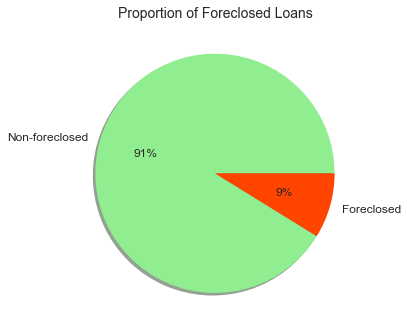

In [14]:
colors = ['cyan','red','yellow','green','orange','blue']
#plt.figure(figsize=(5,5))
df.FORECLOSURE.value_counts(normalize=True).plot(kind='pie', 
                                                 autopct='%1.0f%%', 
                                                 colors = ['lightgreen','orangered'],
                                                 shadow = True,
                                                 labels = ['Non-foreclosed','Foreclosed'],
                                                 fontsize = 12)
plt.ylabel('')
plt.title('Proportion of Foreclosed Loans', fontsize=14)

In [15]:
df.PRODUCT.value_counts()

STHL     7208
LAP      6113
HL       3433
STLAP    3011
Name: PRODUCT, dtype: int64

Text(0.5, 1.0, 'Proportion of Product Types')

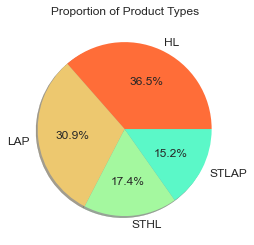

In [16]:
sizes = df['PRODUCT'].value_counts().sort_index() / df['PRODUCT'].value_counts().sum() * 100
plt.figure(figsize=(4,4))
df.PRODUCT.value_counts(normalize=True).plot(kind='pie', autopct='%1.1f%%', colors = color, labels=sizes.index, shadow = True, fontsize = 12)
plt.ylabel('')
plt.title('Proportion of Product Types', fontsize = 12)

In [17]:
df[df.FORECLOSURE == 1].PRODUCT.value_counts()

HL      971
STHL    768
LAP       2
Name: PRODUCT, dtype: int64

Text(0.5, 1.0, 'Proportion of Product Types - Foreclosed')

<Figure size 576x396 with 0 Axes>

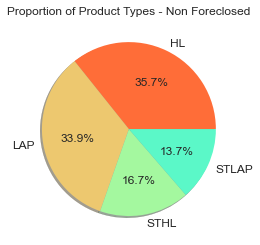

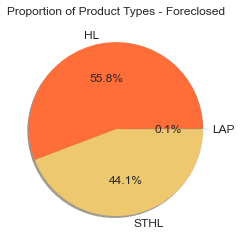

In [18]:
#sizes = df['PRODUCT'].value_counts().sort_index() / df['PRODUCT'].value_counts().sum() * 100

plt.figure(0)
plt.figure(figsize=(4,4))
df[df.FORECLOSURE == 0].PRODUCT.value_counts(normalize=True).plot(kind='pie', autopct='%1.1f%%', colors = color, labels=sizes.index, shadow = True, fontsize = 12)
plt.ylabel('')
plt.title('Proportion of Product Types - Non Foreclosed', fontsize = 12)

plt.figure(1)
plt.figure(figsize=(4,4))
#df[df.FORECLOSURE == 1].PRODUCT.value_counts(normalize=True).plot(kind='pie', autopct='%1.1f%%', colors = color, labels=sizes.index, shadow = True, fontsize = 12)
df[df.FORECLOSURE == 1].PRODUCT.value_counts(normalize=True).plot(kind='pie', autopct='%1.1f%%', colors = color, shadow = True, fontsize = 12)
plt.ylabel('')
plt.title('Proportion of Product Types - Foreclosed', fontsize = 12)

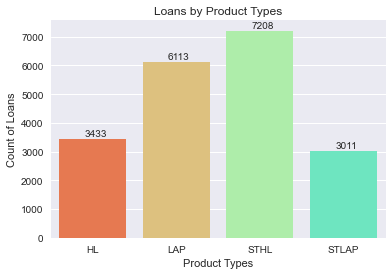

In [19]:
plt.figure(figsize=(6,4))
ax = sns.countplot(df.PRODUCT,palette = color)
plt.title('Loans by Product Types')
plt.xlabel('Product Types')
plt.ylabel('Count of Loans')
for p in ax.patches:
        ax.annotate('{:.0f}'.format(p.get_height()),
                    (p.get_x()+.3,
                     p.get_height()+100))

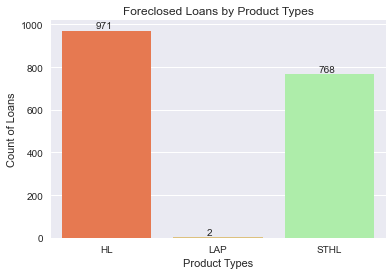

In [20]:
plt.figure(figsize=(6,4))
ax = sns.countplot(df[df.FORECLOSURE == 1].PRODUCT,palette = color)
plt.title('Foreclosed Loans by Product Types')
plt.xlabel('Product Types')
plt.ylabel('Count of Loans')
for p in ax.patches:
        ax.annotate('{:.0f}'.format(p.get_height()),
                    (p.get_x()+.3,
                     p.get_height()+10))

<Figure size 432x288 with 0 Axes>

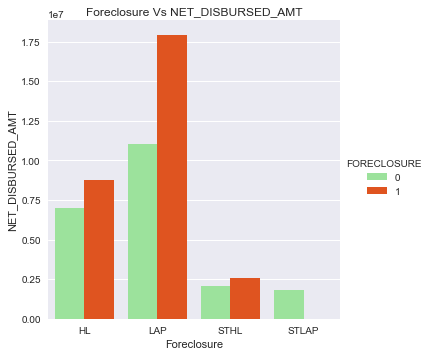

In [21]:
plt.figure(figsize=(6,4))
ax = sns.catplot(x="PRODUCT", y="NET_DISBURSED_AMT", hue = 'FORECLOSURE', kind="bar", data=df, palette = ['lightgreen','orangered'], ci=None)
plt.title('Foreclosure Vs NET_DISBURSED_AMT')
plt.xlabel('Foreclosure')
plt.ylabel('NET_DISBURSED_AMT')
plt.show()

Text(36.003958333333344, 0.5, 'BALANCE_EXCESS')

<Figure size 432x288 with 0 Axes>

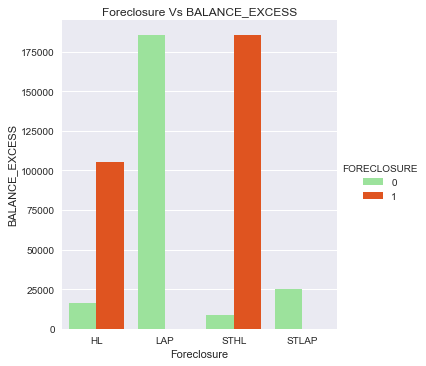

In [22]:
plt.figure(figsize=(6,4))
ax = sns.catplot(x="PRODUCT", y="BALANCE_EXCESS", hue = 'FORECLOSURE', kind="bar", data=df, palette = ['lightgreen','orangered'], ci=None)
#ax = sns.catplot(x="FORECLOSURE", y="BALANCE_EXCESS", hue = 'PRODUCT', kind="bar", data=df, palette = colors, ci=None)
plt.title('Foreclosure Vs BALANCE_EXCESS')
plt.xlabel('Foreclosure')
plt.ylabel('BALANCE_EXCESS')

Text(36.003958333333344, 0.5, 'EXCESS_AVAILABLE')

<Figure size 432x288 with 0 Axes>

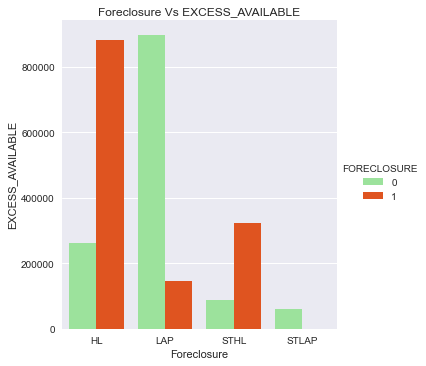

In [23]:
plt.figure(figsize=(6,4))
ax = sns.catplot(x="PRODUCT", y="EXCESS_AVAILABLE", hue = 'FORECLOSURE', kind="bar", data=df, palette = ['lightgreen','orangered'], ci=None)
#ax = sns.catplot(x="FORECLOSURE", y="BALANCE_EXCESS", hue = 'PRODUCT', kind="bar", data=df, palette = colors, ci=None)
plt.title('Foreclosure Vs EXCESS_AVAILABLE')
plt.xlabel('Foreclosure')
plt.ylabel('EXCESS_AVAILABLE')

In [24]:
df.CITY.value_counts()

MUMBAI       1995
HYDERABAD    1556
SURAT        1386
AHMEDABAD    1385
PUNE         1179
             ... 
AMMOOR          1
PINJORE         1
SIHOR           1
ALAPPUZHA       1
OSMANABAD       1
Name: CITY, Length: 271, dtype: int64

(42.5, -0.5)

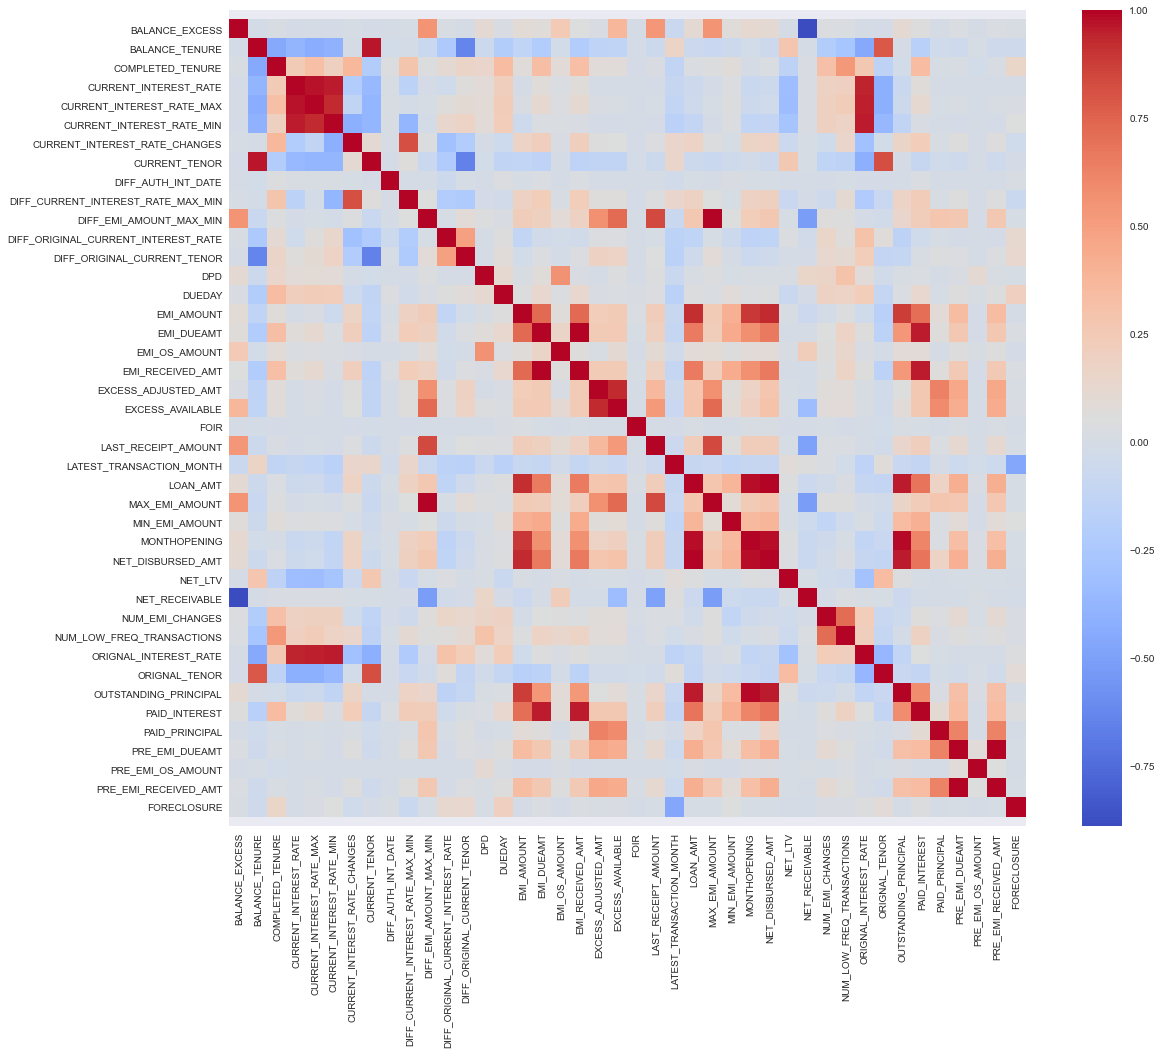

In [25]:
plt.figure(figsize=(20,15))
ax=sns.heatmap(df.corr(),cmap='coolwarm',square=True)
bottom, top = ax.get_ylim()
ax.set_ylim (bottom + 0.5, top - 0.5)

### 1. LOAN AMOUNT

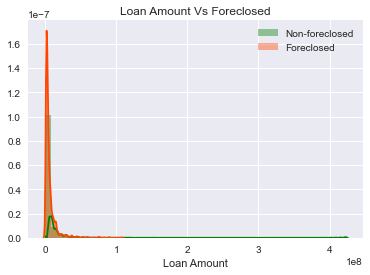

In [26]:
f, ax = plt.subplots(figsize = (6,4))
sns.distplot(df[df.FORECLOSURE==0].LOAN_AMT, label = 'Non-foreclosed', color = 'green')
sns.distplot(df[df.FORECLOSURE==1].LOAN_AMT, label = 'Foreclosed', color = 'orangered')
ax.set_title('Loan Amount Vs Foreclosed',fontsize=12)
ax.set_xlabel('Loan Amount')
ax.legend(ncol = 1)
sns.despine(left = True, bottom = True)
plt.show()

Text(0.5, 1.0, 'Loan Amount to Foreclosure')

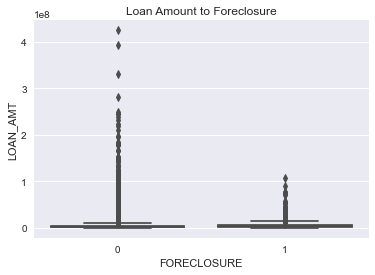

In [27]:
plt.figure(figsize=(6,4))
sns.boxplot(df['FORECLOSURE'], df['LOAN_AMT'], palette = ['lightgreen','orangered'] )
plt.title('Loan Amount to Foreclosure')

### ORIGINAL TENURE

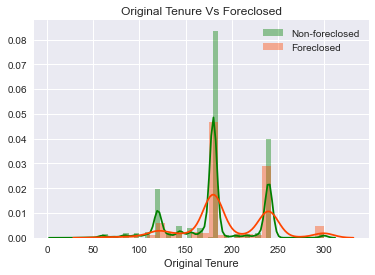

In [28]:
f, ax = plt.subplots(figsize = (6,4))
sns.distplot(df[df.FORECLOSURE==0].ORIGNAL_TENOR, label = 'Non-foreclosed', color = 'green')
sns.distplot(df[df.FORECLOSURE==1].ORIGNAL_TENOR, label = 'Foreclosed', color = 'orangered')
ax.set_title('Original Tenure Vs Foreclosed',fontsize=12)
ax.set_xlabel('Original Tenure')
ax.legend(ncol = 1)
sns.despine(left = True, bottom = True)
plt.show()

Text(0.5, 1.0, 'ORIGINAL TENURE to Foreclosure')

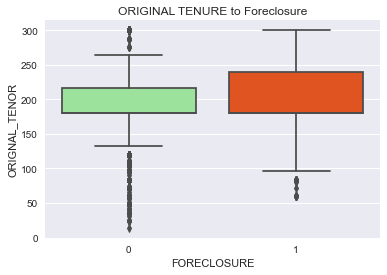

In [29]:
plt.figure(figsize=(6,4))
sns.boxplot(df['FORECLOSURE'], df['ORIGNAL_TENOR'], palette = ['lightgreen','orangered'] )
plt.title('ORIGINAL TENURE to Foreclosure')

### CURRENT TENURE

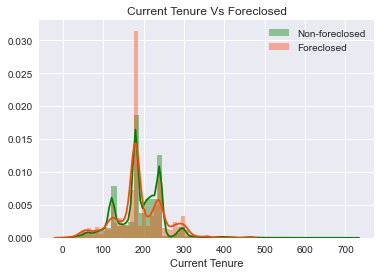

In [30]:
f, ax = plt.subplots(figsize = (6,4))
sns.distplot(df[df.FORECLOSURE==0].CURRENT_TENOR, label = 'Non-foreclosed', color = 'green')
sns.distplot(df[df.FORECLOSURE==1].CURRENT_TENOR, label = 'Foreclosed', color = 'orangered')
ax.set_title('Current Tenure Vs Foreclosed',fontsize=12)
ax.set_xlabel('Current Tenure')
ax.legend(ncol = 1)
sns.despine(left = True, bottom = True)
plt.show()

Text(0.5, 1.0, 'CURRENT TENURE to Foreclosure')

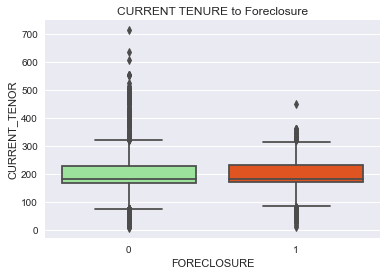

In [31]:
plt.figure(figsize=(6,4))
sns.boxplot(df['FORECLOSURE'], df['CURRENT_TENOR'], palette = ['lightgreen','orangered'] )
plt.title('CURRENT TENURE to Foreclosure')

### CURRENT INTEREST RATE

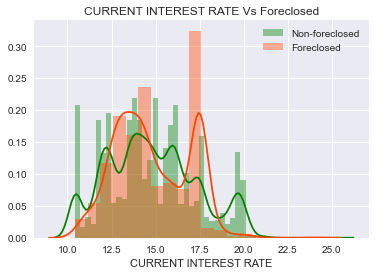

In [32]:
f, ax = plt.subplots(figsize = (6,4))
sns.distplot(df[df.FORECLOSURE==0].CURRENT_INTEREST_RATE, label = 'Non-foreclosed', color = 'green')
sns.distplot(df[df.FORECLOSURE==1].CURRENT_INTEREST_RATE, label = 'Foreclosed', color = 'orangered')
ax.set_title('CURRENT INTEREST RATE Vs Foreclosed',fontsize=12)
ax.set_xlabel('CURRENT INTEREST RATE')
ax.legend(ncol = 1)
sns.despine(left = True, bottom = True)
plt.show()

Text(0.5, 1.0, 'CURRENT INTEREST RATE to Foreclosure')

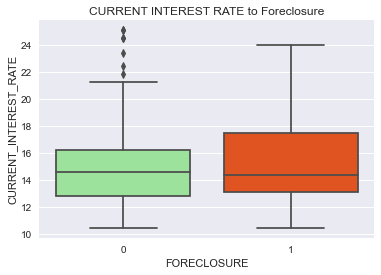

In [33]:
plt.figure(figsize=(6,4))
sns.boxplot(df['FORECLOSURE'], df['CURRENT_INTEREST_RATE'], palette = ['lightgreen','orangered'] )
plt.title('CURRENT INTEREST RATE to Foreclosure')

###  EMI Amount 

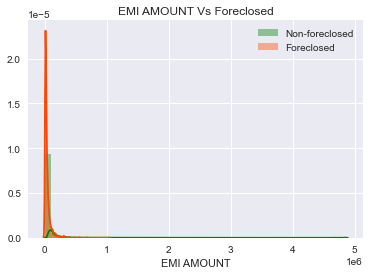

In [34]:
f, ax = plt.subplots(figsize = (6,4))
sns.distplot(df[df.FORECLOSURE==0].EMI_AMOUNT, label = 'Non-foreclosed', color = 'green')
sns.distplot(df[df.FORECLOSURE==1].EMI_AMOUNT, label = 'Foreclosed', color = 'orangered')
ax.set_title('EMI AMOUNT Vs Foreclosed',fontsize=12)
ax.set_xlabel('EMI AMOUNT')
ax.legend(ncol = 1)
sns.despine(left = True, bottom = True)
plt.show()

Text(0.5, 1.0, 'EMI_AMOUNT to Foreclosure')

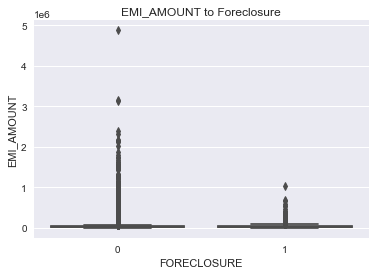

In [35]:
plt.figure(figsize=(6,4))
sns.boxplot(df['FORECLOSURE'], df['EMI_AMOUNT'] , palette = ['lightgreen','orangered'])
plt.title('EMI_AMOUNT to Foreclosure')

Text(0.5, 1.0, 'Proportion of Product Types - EMI Above Rs 50000')

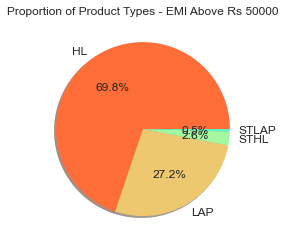

In [36]:
plt.figure(figsize=(4,4))
df[df.EMI_AMOUNT >= 50000].PRODUCT.value_counts(normalize=True).plot(kind='pie', autopct='%1.1f%%', colors = color, labels=sizes.index, shadow = True, fontsize = 12)
plt.ylabel('')
plt.title('Proportion of Product Types - EMI Above Rs 50000', fontsize = 12)

Text(0.5, 1.0, 'Proportion of Product Types - EMI below Rs 50000')

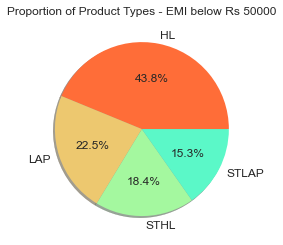

In [37]:
plt.figure(figsize=(4,4))
df[df.EMI_AMOUNT < 50000].PRODUCT.value_counts(normalize=True).plot(kind='pie', autopct='%1.1f%%', colors = color, labels=sizes.index, shadow = True, fontsize = 12)
plt.ylabel('')
plt.title('Proportion of Product Types - EMI below Rs 50000', fontsize = 12)

### NUM EMI CHANGES

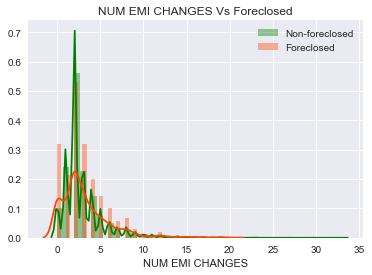

In [38]:
f, ax = plt.subplots(figsize = (6,4))
sns.distplot(df[df.FORECLOSURE==0].NUM_EMI_CHANGES, label = 'Non-foreclosed', color = 'green')
sns.distplot(df[df.FORECLOSURE==1].NUM_EMI_CHANGES, label = 'Foreclosed', color = 'orangered')
ax.set_title('NUM EMI CHANGES Vs Foreclosed',fontsize=12)
ax.set_xlabel('NUM EMI CHANGES')
ax.legend(ncol = 1)
sns.despine(left = True, bottom = True)
plt.show()

Text(0.5, 1.0, 'NUM_EMI_CHANGES to Foreclosure')

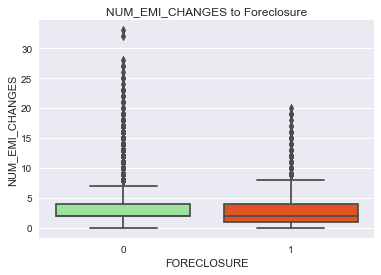

In [39]:
plt.figure(figsize=(6,4))
sns.boxplot(df['FORECLOSURE'], df['NUM_EMI_CHANGES'] , palette = ['lightgreen','orangered'])
plt.title('NUM_EMI_CHANGES to Foreclosure')

### FOIR

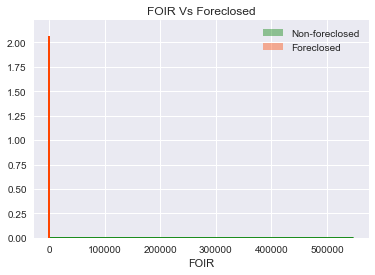

In [40]:
f, ax = plt.subplots(figsize = (6,4))
sns.distplot(df[df.FORECLOSURE==0].FOIR, label = 'Non-foreclosed', color = 'green')
sns.distplot(df[df.FORECLOSURE==1].FOIR, label = 'Foreclosed', color = 'orangered')
ax.set_title('FOIR Vs Foreclosed',fontsize=12)
ax.set_xlabel('FOIR')
ax.legend(ncol = 1)
sns.despine(left = True, bottom = True)
plt.show()

Text(0.5, 1.0, 'FOIR to Foreclosure')

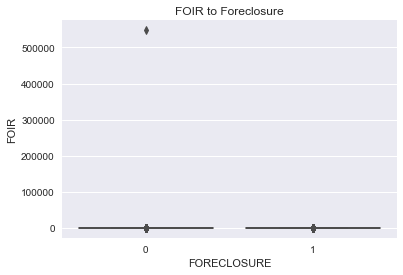

In [41]:
plt.figure(figsize=(6,4))
sns.boxplot(df['FORECLOSURE'], df['FOIR'] , palette = ['lightgreen','orangered'])
plt.title('FOIR to Foreclosure')

In [42]:
# Fixed obligation to income ratio values must be between 0 and 1. So values above 1 can be imputed to 1
df['FOIR'] = np.where(df['FOIR'] > 1, 1, df['FOIR'])
df['FOIR'] = np.where(df['FOIR'] < 0, 0, df['FOIR'])

Text(0.5, 1.0, 'FOIR to Foreclosure')

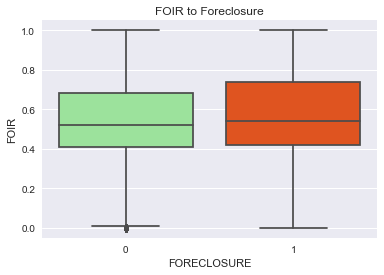

In [43]:
plt.figure(figsize=(6,4))
sns.boxplot(df['FORECLOSURE'], df['FOIR'] , palette = ['lightgreen','orangered'])
plt.title('FOIR to Foreclosure')

### No of low freq transactions

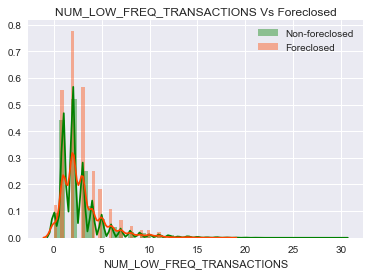

In [44]:
f, ax = plt.subplots(figsize = (6,4))
sns.distplot(df[df.FORECLOSURE==0].NUM_LOW_FREQ_TRANSACTIONS, label = 'Non-foreclosed', color = 'green')
sns.distplot(df[df.FORECLOSURE==1].NUM_LOW_FREQ_TRANSACTIONS, label = 'Foreclosed', color = 'orangered')
ax.set_title('NUM_LOW_FREQ_TRANSACTIONS Vs Foreclosed',fontsize=12)
ax.set_xlabel('NUM_LOW_FREQ_TRANSACTIONS')
ax.legend(ncol = 1)
sns.despine(left = True, bottom = True)
plt.show()

Text(0.5, 1.0, 'NUM_LOW_FREQ_TRANSACTIONS to Foreclosure')

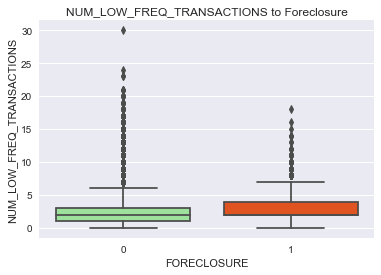

In [45]:
plt.figure(figsize=(6,4))
sns.boxplot(df['FORECLOSURE'], df['NUM_LOW_FREQ_TRANSACTIONS'] , palette = ['lightgreen','orangered'])
plt.title('NUM_LOW_FREQ_TRANSACTIONS to Foreclosure')

### OUTSTANDING_PRINCIPAL

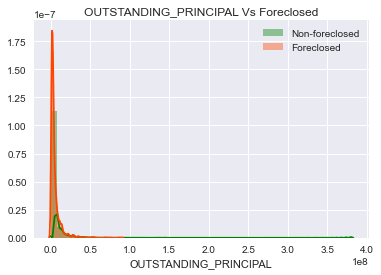

In [46]:
f, ax = plt.subplots(figsize = (6,4))
sns.distplot(df[df.FORECLOSURE==0].OUTSTANDING_PRINCIPAL, label = 'Non-foreclosed', color = 'green')
sns.distplot(df[df.FORECLOSURE==1].OUTSTANDING_PRINCIPAL, label = 'Foreclosed', color = 'orangered')
ax.set_title('OUTSTANDING_PRINCIPAL Vs Foreclosed',fontsize=12)
ax.set_xlabel('OUTSTANDING_PRINCIPAL')
ax.legend(ncol = 1)
sns.despine(left = True, bottom = True)
plt.show()

Text(0.5, 1.0, 'OUTSTANDING_PRINCIPAL to Foreclosure')

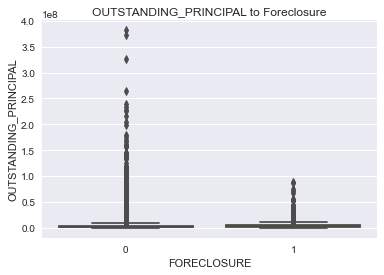

In [47]:
plt.figure(figsize=(6,4))
sns.boxplot(df['FORECLOSURE'], df['OUTSTANDING_PRINCIPAL'] , palette = ['lightgreen','orangered'])
plt.title('OUTSTANDING_PRINCIPAL to Foreclosure')

### Net Loan to Value

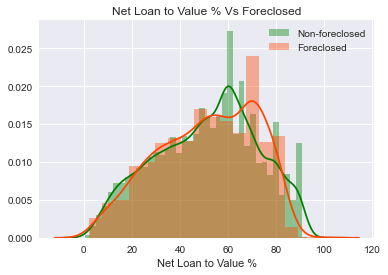

In [48]:
f, ax = plt.subplots(figsize = (6,4))
sns.distplot(df[df.FORECLOSURE==0].NET_LTV, label = 'Non-foreclosed', color = 'green')
sns.distplot(df[df.FORECLOSURE==1].NET_LTV, label = 'Foreclosed', color = 'orangered')
ax.set_title('Net Loan to Value % Vs Foreclosed',fontsize=12)
ax.set_xlabel('Net Loan to Value %')
ax.legend(ncol = 1)
sns.despine(left = True, bottom = True)
plt.show()

Text(0.5, 1.0, 'NET_LTV to Foreclosure')

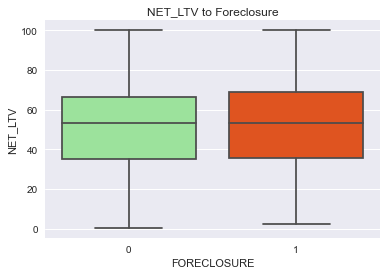

In [49]:
plt.figure(figsize=(6,4))
sns.boxplot(df['FORECLOSURE'], df['NET_LTV'] , palette = ['lightgreen','orangered'])
plt.title('NET_LTV to Foreclosure')

### DPD

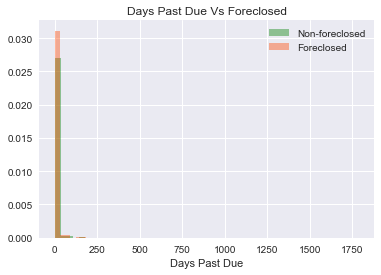

In [50]:
f, ax = plt.subplots(figsize = (6,4))
sns.distplot(df[df.FORECLOSURE==0].DPD, label = 'Non-foreclosed', color = 'green')
sns.distplot(df[df.FORECLOSURE==1].DPD, label = 'Foreclosed', color = 'orangered')
ax.set_title('Days Past Due Vs Foreclosed',fontsize=12)
ax.set_xlabel('Days Past Due')
ax.legend(ncol = 1)
sns.despine(left = True, bottom = True)
plt.show()

Text(0.5, 1.0, 'DPD to Foreclosure')

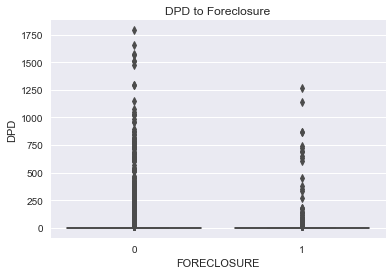

In [51]:
plt.figure(figsize=(6,4))
sns.boxplot(df['FORECLOSURE'], df['DPD'] , palette = ['lightgreen','orangered'])
plt.title('DPD to Foreclosure')

In [52]:
count = 0
for i in df.DPD : 
    if i > 0 : 
        count = count + 1

In [53]:
print ("Number of observations with DPD above ZERO : " + str(count))

Number of observations with DPD above ZERO : 1195


In [54]:
#939/15705

In [55]:
#df.drop('DPD', axis = 1, inplace = True)

### EXCESS AVAILABLE

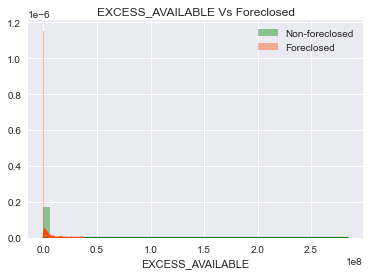

In [56]:
f, ax = plt.subplots(figsize = (6,4))
sns.distplot(df[df.FORECLOSURE==0].EXCESS_AVAILABLE, label = 'Non-foreclosed', color = 'green')
sns.distplot(df[df.FORECLOSURE==1].EXCESS_AVAILABLE, label = 'Foreclosed', color = 'orangered')
ax.set_title('EXCESS_AVAILABLE Vs Foreclosed',fontsize=12)
ax.set_xlabel('EXCESS_AVAILABLE')
ax.legend(ncol = 1)
sns.despine(left = True, bottom = True)
plt.show()

Text(0.5, 1.0, 'EXCESS_AVAILABLE to Foreclosure')

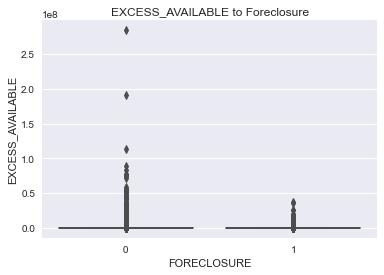

In [57]:
plt.figure(figsize=(6,4))
sns.boxplot(df['FORECLOSURE'], df['EXCESS_AVAILABLE'] , palette = ['lightgreen','orangered'])
plt.title('EXCESS_AVAILABLE to Foreclosure')

### MONTH OPENING

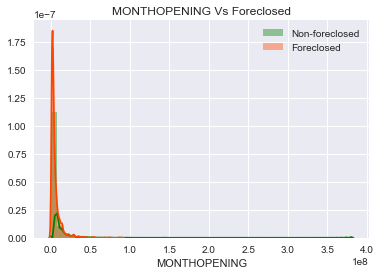

In [58]:
f, ax = plt.subplots(figsize = (6,4))
sns.distplot(df[df.FORECLOSURE==0].MONTHOPENING, label = 'Non-foreclosed', color = 'green')
sns.distplot(df[df.FORECLOSURE==1].MONTHOPENING, label = 'Foreclosed', color = 'orangered')
ax.set_title('MONTHOPENING Vs Foreclosed',fontsize=12)
ax.set_xlabel('MONTHOPENING')
ax.legend(ncol = 1)
sns.despine(left = True, bottom = True)
plt.show()

Text(0.5, 1.0, 'MONTHOPENING to Foreclosure')

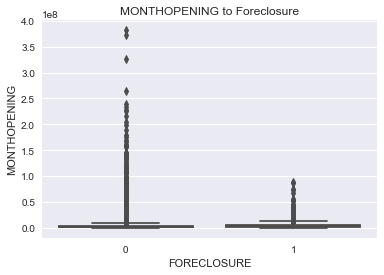

In [59]:
plt.figure(figsize=(6,4))
sns.boxplot(df['FORECLOSURE'], df['MONTHOPENING'] , palette = ['lightgreen','orangered'])
plt.title('MONTHOPENING to Foreclosure')

In [60]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 19765 entries, 0 to 20011
Data columns (total 47 columns):
 #   Column                               Non-Null Count  Dtype         
---  ------                               --------------  -----         
 0   AUTHORIZATIONDATE                    19765 non-null  datetime64[ns]
 1   BALANCE_EXCESS                       19765 non-null  float64       
 2   BALANCE_TENURE                       19765 non-null  int64         
 3   CITY                                 19765 non-null  object        
 4   COMPLETED_TENURE                     19765 non-null  int64         
 5   CURRENT_INTEREST_RATE                19765 non-null  float64       
 6   CURRENT_INTEREST_RATE_MAX            19765 non-null  float64       
 7   CURRENT_INTEREST_RATE_MIN            19765 non-null  float64       
 8   CURRENT_INTEREST_RATE_CHANGES        19765 non-null  int64         
 9   CURRENT_TENOR                        19765 non-null  int64         
 10  DIFF_AUTH_

In [61]:
df_final = df[['NET_DISBURSED_AMT',
               'ORIGNAL_TENOR',
               'CURRENT_TENOR', 
               'COMPLETED_TENURE',
               'ORIGNAL_INTEREST_RATE',
               'CURRENT_INTEREST_RATE',
               'CURRENT_INTEREST_RATE_MAX',
               'CURRENT_INTEREST_RATE_CHANGES',
               'DPD',
               'DUEDAY',
               'EMI_AMOUNT',
               'EMI_OS_AMOUNT', 
               'MAX_EMI_AMOUNT',
               'LAST_RECEIPT_AMOUNT',
               'EXCESS_ADJUSTED_AMT',
               'EXCESS_AVAILABLE',
               'FOIR',
               'NET_LTV',
               'NUM_EMI_CHANGES',
               'NUM_LOW_FREQ_TRANSACTIONS',
               'OUTSTANDING_PRINCIPAL',
               'PAID_INTEREST',
               'PAID_PRINCIPAL',
               'PRODUCT']]

In [62]:
df_final['DUEDAY'] = df_final['DUEDAY'].astype('object')

(22.5, -0.5)

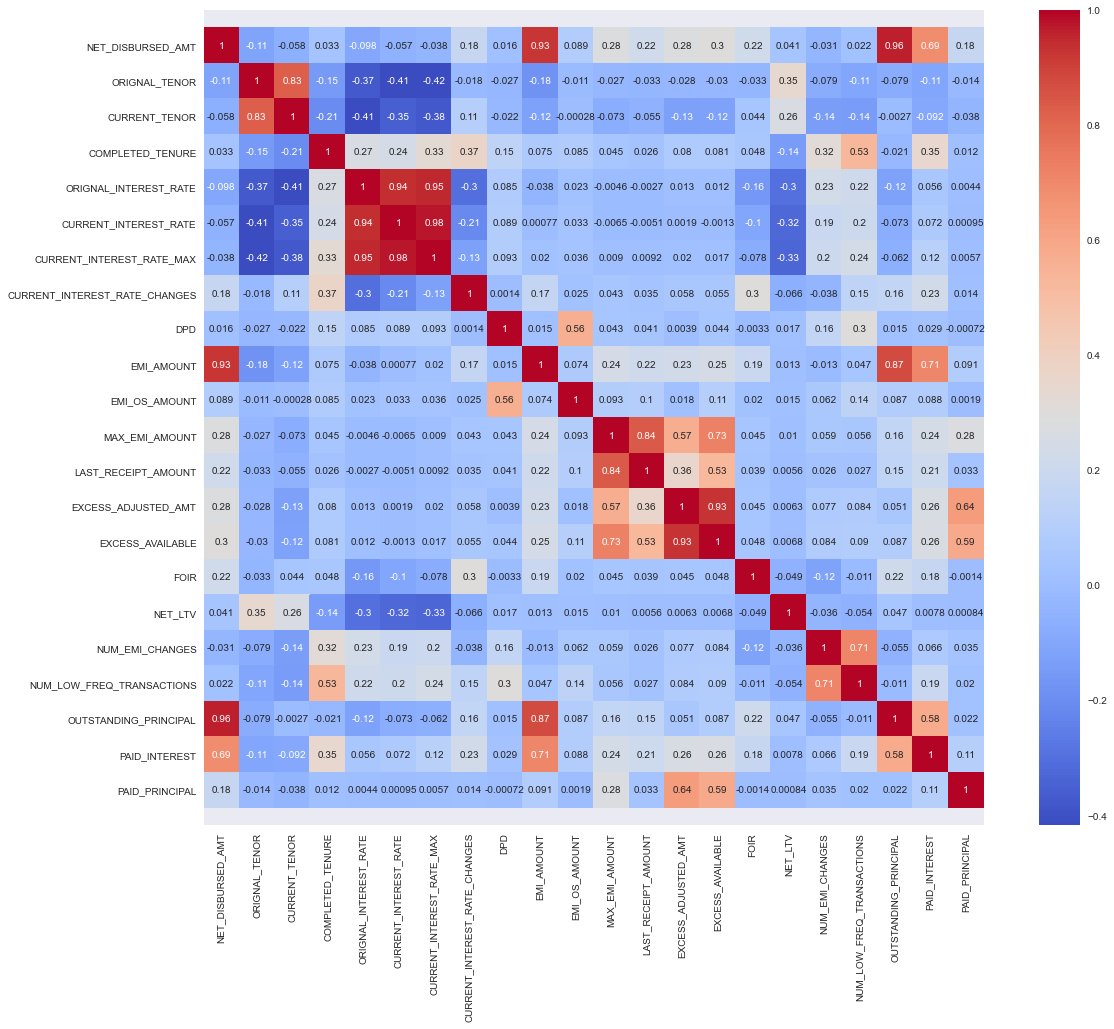

In [63]:
plt.figure(figsize=(20,15))
ax=sns.heatmap(df_final.corr(),cmap='coolwarm',square=True, annot = True)
bottom, top = ax.get_ylim()
ax.set_ylim (bottom + 0.5, top - 0.5)

In [64]:
df_final = pd.get_dummies(df_final, columns=['PRODUCT','DUEDAY'],drop_first=True)

In [65]:
from sklearn.preprocessing import StandardScaler

In [66]:
X = StandardScaler()

In [67]:
scaled_df = X.fit_transform(df_final)

In [68]:
scaled_df

array([[ 0.46276533, -1.42292854, -2.49966331, ..., -0.42393192,
        -3.34111911, -0.29119912],
       [ 1.05409655, -0.07643312, -0.92016072, ..., -0.42393192,
        -3.34111911, -0.29119912],
       [-0.14390012, -0.07643312,  2.08432791, ..., -0.42393192,
         0.29930091, -0.29119912],
       ...,
       [ 1.18889   , -1.9615267 , -1.62406948, ..., -0.42393192,
         0.29930091, -0.29119912],
       [ 4.35655733, -2.76942396, -2.24213572, ..., -0.42393192,
        -3.34111911,  3.43407633],
       [ 0.42763027, -1.42292854, -1.21202533, ..., -0.42393192,
         0.29930091, -0.29119912]])

In [69]:
scaled_df = pd.DataFrame(scaled_df, index=df.index, columns=df_final.columns)
scaled_df.head()

,NET_DISBURSED_AMT,ORIGNAL_TENOR,CURRENT_TENOR,COMPLETED_TENURE,ORIGNAL_INTEREST_RATE,CURRENT_INTEREST_RATE,CURRENT_INTEREST_RATE_MAX,CURRENT_INTEREST_RATE_CHANGES,DPD,EMI_AMOUNT,...,NUM_EMI_CHANGES,NUM_LOW_FREQ_TRANSACTIONS,OUTSTANDING_PRINCIPAL,PAID_INTEREST,PAID_PRINCIPAL,PRODUCT_LAP,PRODUCT_STHL,PRODUCT_STLAP,DUEDAY_5,DUEDAY_15
0,0.462765,-1.422929,-2.499663,1.683622,-1.455650,-0.549491,-0.472080,0.207980,-0.114808,0.352070,...,-0.748692,-0.691632,-0.440028,0.571604,0.308128,-0.669159,-0.757643,-0.423932,-3.341119,-0.291199
1,1.054097,-0.076433,-0.920161,1.257993,-1.455650,-0.423772,-0.472080,-0.671508,-0.114808,0.731449,...,-1.130042,-1.082631,0.625740,1.302470,0.174803,-0.669159,-0.757643,-0.423932,-3.341119,-0.291199
2,-0.143900,-0.076433,2.084328,3.872573,-1.095782,0.330543,0.535582,1.087468,-0.114808,-0.183664,...,-0.367342,0.090366,-0.189275,0.658672,0.002710,-0.669159,-0.757643,-0.423932,0.299301,-0.291199
3,0.331121,-0.076433,-1.709912,4.480615,-1.455650,-1.429524,-0.472080,2.846445,-0.114808,0.194760,...,0.014008,2.045361,-0.446432,1.204944,0.261860,-0.669159,-0.757643,-0.423932,-3.341119,-0.291199
4,0.154298,-0.076433,1.946980,4.359006,-1.335694,0.079105,0.283667,1.087468,-0.114808,0.094925,...,-1.130042,0.090366,0.177258,1.845368,-0.008296,-0.669159,-0.757643,-0.423932,0.299301,-0.291199


In [70]:
df_final['FORECLOSURE']=df['FORECLOSURE']
scaled_df['FORECLOSURE']=df['FORECLOSURE']

## Train Test Split

# LogisticRegression

In [73]:
from sklearn.linear_model import LogisticRegression
# Fit the Logistic Regression model
#logit_model = LogisticRegression(solver='newton-cg',max_iter=10000,penalty='none',n_jobs=2)
logit_model = LogisticRegression()
logit_model.fit(X_train, y_train)

LogisticRegression()

ytrain_predict = logit_model.predict(X_train)
ytest_predict = logit_model.predict(X_test)

In [74]:
ytrain_predict = logit_model.predict(X_train)
ytest_predict = logit_model.predict(X_test)

In [75]:
ytest_predict_prob=logit_model.predict_proba(X_test)
pd.DataFrame(ytest_predict_prob).sample(10)

,0,1
4507,0.999987,1.299242e-05
2625,1.000000,6.576268e-08
5396,0.803818,1.961817e-01
3174,0.999999,7.362801e-07
4445,0.999879,1.209842e-04
5882,1.000000,2.961081e-07
3851,0.999459,5.411037e-04
3099,0.960229,3.977126e-02
1772,0.999804,1.959317e-04
60,0.999999,5.077913e-07


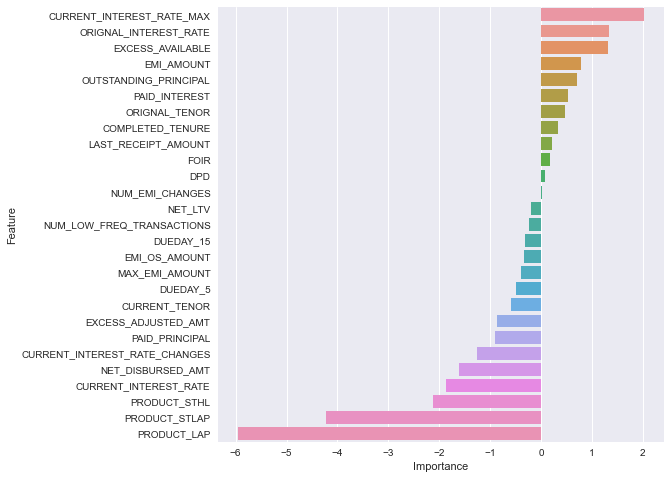

In [76]:
feature_rank = pd.DataFrame({'Feature' : X_train.columns,'Importance' : logit_model.coef_[0]})
feature_rank = feature_rank.sort_values('Importance', ascending=False )
plt.figure(figsize=(8,8))
sns.barplot(y='Feature', x='Importance', data=feature_rank)

In [77]:
from sklearn.metrics import roc_auc_score,roc_curve,classification_report,confusion_matrix

In [78]:
def performance_matrices(model, X_data, y_data, y_predicted):
    accuracy = round(model.score(X_data,y_data),2)
    metrics=classification_report(y_data, y_predicted,output_dict=True)
    met_df=pd.DataFrame(metrics).transpose()
    # Keeping the performance matrices of minority class, conservative
    precision=round(met_df.loc["0"][0],2)
    recall=round(met_df.loc["0"][1],2)
    f1=round(met_df.loc["0"][2],2)
    return (met_df, accuracy,precision,recall,f1);

In [79]:
logit_met,logit_train_accu, logit_train_precision, logit_train_recall, logit_train_f1 = performance_matrices(logit_model, X_train, y_train, ytrain_predict)
print ('logit_train_accu ',logit_train_accu)
print ('logit_train_precision ',logit_train_precision)
print ('logit_train_recall ',logit_train_recall)
print ('logit_train_f1 ',logit_train_f1)

logit_train_accu  0.94
logit_train_precision  0.95
logit_train_recall  0.98
logit_train_f1  0.97


In [80]:
logit_met

,precision,recall,f1-score,support
0,0.952439,0.983419,0.967681,12605.000000
1,0.745122,0.496748,0.596098,1230.000000
accuracy,0.940152,0.940152,0.940152,0.940152
macro avg,0.848781,0.740084,0.781890,13835.000000
weighted avg,0.934008,0.940152,0.934646,13835.000000


In [194]:
def draw_cm(actual, predicted, title):
    cm = confusion_matrix(actual, predicted, [0,1])
    plt.subplots(figsize=(4,3))
    ax = sns.heatmap(cm, cmap = 'Paired', annot=True, fmt='.0f',annot_kws={"fontsize":12},
              xticklabels = ["0", "1"],
              yticklabels = ["0", "1"],
                    cbar = False)
    bottom, top = ax.get_ylim()
    ax.set_ylim (bottom + 0.5, top - 0.5)
    plt.ylabel('Actual')
    plt.xlabel('Predicted')
    plt.title(title)
    plt.show()

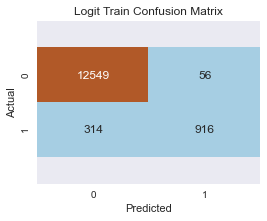

In [195]:
draw_cm(y_train,ytrain_predict,"Logit Train Confusion Matrix")

In [83]:
def draw_auc_roc(model, X_data, y_data, line_color, title):
    probs = model.predict_proba(X_data)
    probs = probs[:, 1]
    model_auc = roc_auc_score(y_data, probs)
    model_fpr, model_tpr, thresholds = roc_curve(y_data, probs)
    plt.plot([0, 1], [0, 1], linestyle='--')
    plt.plot(model_fpr, model_tpr, color = line_color)
    plt.xlabel('False Positive Rate')
    plt.ylabel('True Positive Rate')
    plt.title(title)
    # show the plot
    plt.show()
    return model_auc, model_fpr, model_tpr;

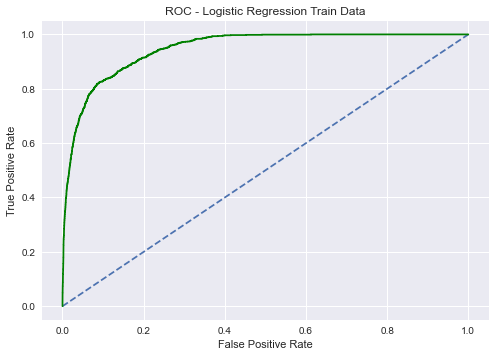

logit_train_auc 0.9468296552858427


In [84]:
logit_train_auc, logit_train_fpr, logit_train_tpr = draw_auc_roc(logit_model, X_train, y_train, 'g', 'ROC - Logistic Regression Train Data')
print('logit_train_auc', logit_train_auc)

In [85]:
logit_met,logit_test_accu, logit_test_precision, logit_test_recall, logit_test_f1 = performance_matrices(logit_model, X_test, y_test, ytest_predict)
print ('logit_test_accu ',logit_test_accu)
print ('logit_test_precision ',logit_test_precision)
print ('logit_test_recall ',logit_test_recall)
print ('logit_test_f1 ',logit_test_f1)

logit_test_accu  0.94
logit_test_precision  0.95
logit_test_recall  0.98
logit_test_f1  0.97


In [86]:
logit_met

,precision,recall,f1-score,support
0,0.951198,0.981915,0.966313,5419.000000
1,0.708333,0.465753,0.561983,511.000000
accuracy,0.937437,0.937437,0.937437,0.937437
macro avg,0.829766,0.723834,0.764148,5930.000000
weighted avg,0.930270,0.937437,0.931471,5930.000000


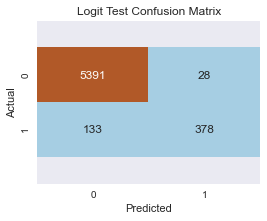

In [197]:
draw_cm(y_test,ytest_predict,"Logit Test Confusion Matrix")

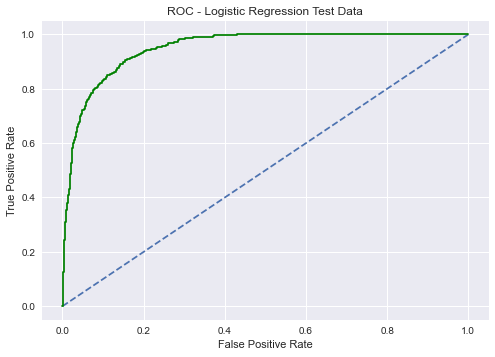

logit_test_auc 0.9485502376396162


In [88]:
logit_test_auc, logit_test_fpr, logit_test_tpr = draw_auc_roc(logit_model, X_test, y_test, 'g', 'ROC - Logistic Regression Test Data')
print('logit_test_auc', logit_test_auc)

## LDA Model

In [89]:
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
clf = LinearDiscriminantAnalysis()
LDA_model=clf.fit(X_train,y_train)
LDA_model

LinearDiscriminantAnalysis()

In [90]:
ytrain_predict = LDA_model.predict(X_train)
ytest_predict = LDA_model.predict(X_test)

In [91]:
ytest_predict_prob=logit_model.predict_proba(X_test)
pd.DataFrame(ytest_predict_prob).head(10)

,0,1
0,0.831222,0.168778
1,0.985058,0.014942
2,0.996674,0.003326
3,0.887855,0.112145
4,0.171513,0.828487
5,0.911364,0.088636
6,0.965650,0.034350
7,0.999991,0.000009
8,0.287798,0.712202
9,0.999906,0.000094


In [92]:
LDA_met,LDA_test_accu,LDA_test_precision,LDA_test_recall,LDA_test_f1 = performance_matrices(LDA_model, X_test, y_test, ytest_predict)
print ('LDA_test_accu ',LDA_test_accu)
print ('LDA_test_precision ',LDA_test_precision)
print ('LDA_test_recall ',LDA_test_recall)
print ('LDA_test_f1 ',LDA_test_f1)

LDA_test_accu  0.93
LDA_test_precision  0.95
LDA_test_recall  0.98
LDA_test_f1  0.96


In [198]:
LDA_met

,precision,recall,f1-score,support
0,0.991238,0.793320,0.881304,5419.000000
1,0.296924,0.925636,0.449620,511.000000
accuracy,0.804722,0.804722,0.804722,0.804722
macro avg,0.644081,0.859478,0.665462,5930.000000
weighted avg,0.931408,0.804722,0.844105,5930.000000


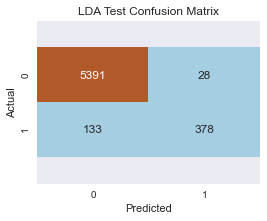

In [199]:
draw_cm(y_test,ytest_predict,"LDA Test Confusion Matrix")

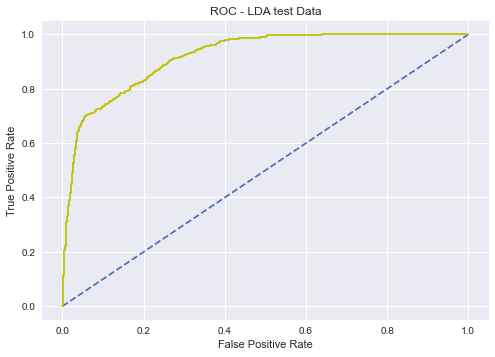

LDA_test_auc 0.9188482649112044


In [94]:
LDA_test_auc, LDA_test_fpr, LDA_test_tpr = draw_auc_roc(LDA_model, X_test, y_test, 'y', 'ROC - LDA test Data')
print('LDA_test_auc', LDA_test_auc)

## KNN Model

In [97]:
from sklearn.neighbors import KNeighborsClassifier

KNN_model=KNeighborsClassifier()
KNN_model.fit(X_train,y_train)

KNeighborsClassifier()

In [98]:
ytrain_predict = KNN_model.predict(X_train)
ytest_predict = KNN_model.predict(X_test)

In [99]:
KNN_met,KNN_test_accu,KNN_test_precision,KNN_test_recall,KNN_test_f1 = performance_matrices(KNN_model, X_test, y_test, ytest_predict)
print ('KNN_test_accu ',KNN_test_accu)
print ('KNN_test_precision ',KNN_test_precision)
print ('KNN_test_recall ',KNN_test_recall)
print ('KNN_test_f1 ',KNN_test_f1)

KNN_test_accu  0.95
KNN_test_precision  0.96
KNN_test_recall  0.99
KNN_test_f1  0.98


In [100]:
KNN_met

,precision,recall,f1-score,support
0,0.961801,0.989666,0.975534,5419.000000
1,0.841808,0.583170,0.689017,511.000000
accuracy,0.954637,0.954637,0.954637,0.954637
macro avg,0.901804,0.786418,0.832276,5930.000000
weighted avg,0.951461,0.954637,0.950845,5930.000000


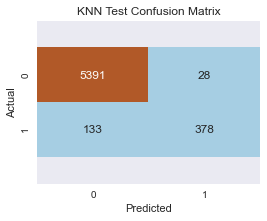

In [200]:
draw_cm(y_test,ytest_predict,"KNN Test Confusion Matrix")

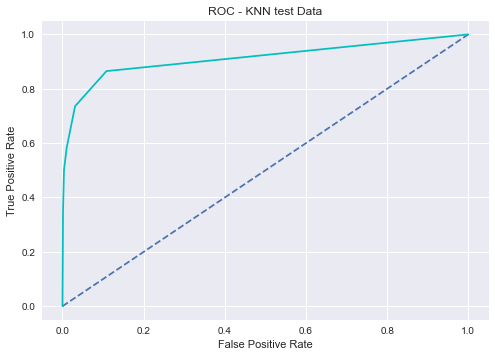

KNN_test_auc 0.9118380677683687


In [102]:
KNN_test_auc, KNN_test_fpr, KNN_test_tpr = draw_auc_roc(KNN_model, X_test, y_test, 'c', 'ROC - KNN test Data')
print('KNN_test_auc', KNN_test_auc)

## Naive Bayes Model

In [202]:
from sklearn.naive_bayes import GaussianNB
from sklearn import metrics

In [205]:
## Performance Matrix on test data set
y_test_predict = model.predict(X_test)
model_score = model.score(X_test, y_test)
print(model_score)
print(metrics.confusion_matrix(y_test, y_test_predict))
print(metrics.classification_report(y_test, y_test_predict))

0.5499156829679596
[[2763 2656]
 [  13  498]]
              precision    recall  f1-score   support

           0       1.00      0.51      0.67      5419
           1       0.16      0.97      0.27       511

    accuracy                           0.55      5930
   macro avg       0.58      0.74      0.47      5930
weighted avg       0.92      0.55      0.64      5930



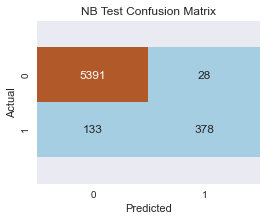

In [206]:
draw_cm(y_test,ytest_predict,"NB Test Confusion Matrix")

## SVM Model

In [114]:
from sklearn import svm

SVM_model= svm.SVC(probability=True,random_state=1)
SVM_model.fit(X_train, y_train)

SVC(probability=True, random_state=1)

In [115]:
ytrain_predict = SVM_model.predict(X_train)
ytest_predict = SVM_model.predict(X_test)

In [116]:
SVM_met,SVM_test_accu,SVM_test_precision,SVM_test_recall,SVM_test_f1 = performance_matrices(SVM_model, X_test, y_test, ytest_predict)
print ('SVM_test_accu ',SVM_test_accu)
print ('SVM_test_precision ',SVM_test_precision)
print ('SVM_test_recall ',SVM_test_recall)
print ('SVM_test_f1 ',SVM_test_f1)

SVM_test_accu  0.96
SVM_test_precision  0.97
SVM_test_recall  1.0
SVM_test_f1  0.98


In [117]:
SVM_met

,precision,recall,f1-score,support
0,0.965098,0.995018,0.979829,5419.000000
1,0.921283,0.618395,0.740047,511.000000
accuracy,0.962563,0.962563,0.962563,0.962563
macro avg,0.943190,0.806706,0.859938,5930.000000
weighted avg,0.961322,0.962563,0.959167,5930.000000


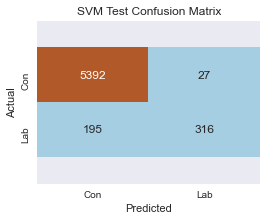

In [120]:
draw_cm(y_test,ytest_predict,"SVM Test Confusion Matrix")

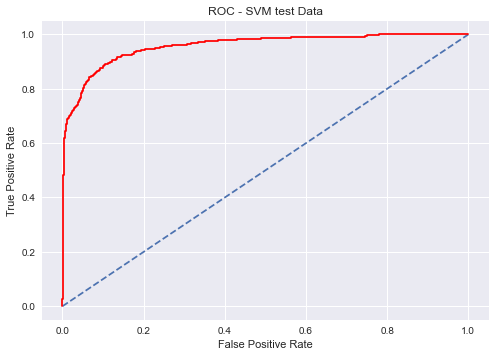

SVM_test_auc 0.9571855062404551


In [119]:
SVM_test_auc, SVM_test_fpr, SVM_test_tpr = draw_auc_roc(SVM_model, X_test, y_test, 'r', 'ROC - SVM test Data')
print('SVM_test_auc', SVM_test_auc)

## Model Tuning

In [208]:
from imblearn.over_sampling import SMOTE 
sm = SMOTE(random_state = 2) 
X_train_res, y_train_res = sm.fit_sample(X_train, y_train.ravel()) 

In [123]:
print('Before SMOTE: ',X_train.shape)
print('After SMOTE: ',X_train_res.shape)

Before SMOTE:  (13835, 27)
After SMOTE:  (25210, 27)


In [125]:
logit_met,logit_test_accu, logit_test_precision, logit_test_recall, logit_test_f1 = performance_matrices(logit_model, X_test, y_test, ytest_predict)
print ('logit_test_accu ',logit_test_accu)
print ('logit_test_precision ',logit_test_precision)
print ('logit_test_recall ',logit_test_recall)
print ('logit_test_f1 ',logit_test_f1)

logit_test_accu  0.94
logit_test_precision  0.97
logit_test_recall  1.0
logit_test_f1  0.98


In [127]:
logit_met

,precision,recall,f1-score,support
0,0.965098,0.995018,0.979829,5419.000000
1,0.921283,0.618395,0.740047,511.000000
accuracy,0.962563,0.962563,0.962563,0.962563
macro avg,0.943190,0.806706,0.859938,5930.000000
weighted avg,0.961322,0.962563,0.959167,5930.000000


In [129]:
KNN_met,KNN_test_accu,KNN_test_precision,KNN_test_recall,KNN_test_f1 = performance_matrices(KNN_model, X_test, y_test, ytest_predict)
print ('KNN_test_accu ',KNN_test_accu)
print ('KNN_test_precision ',KNN_test_precision)
print ('KNN_test_recall ',KNN_test_recall)
print ('KNN_test_f1 ',KNN_test_f1)

KNN_test_accu  0.95
KNN_test_precision  0.97
KNN_test_recall  1.0
KNN_test_f1  0.98


In [130]:
KNN_met

,precision,recall,f1-score,support
0,0.965098,0.995018,0.979829,5419.000000
1,0.921283,0.618395,0.740047,511.000000
accuracy,0.962563,0.962563,0.962563,0.962563
macro avg,0.943190,0.806706,0.859938,5930.000000
weighted avg,0.961322,0.962563,0.959167,5930.000000


In [131]:
SVM_met,SVM_test_accu,SVM_test_precision,SVM_test_recall,SVM_test_f1 = performance_matrices(SVM_model, X_test, y_test, ytest_predict)
print ('SVM_test_accu ',SVM_test_accu)
print ('SVM_test_precision ',SVM_test_precision)
print ('SVM_test_recall ',SVM_test_recall)
print ('SVM_test_f1 ',SVM_test_f1)

SVM_test_accu  0.96
SVM_test_precision  0.97
SVM_test_recall  1.0
SVM_test_f1  0.98


In [132]:
SVM_met

,precision,recall,f1-score,support
0,0.965098,0.995018,0.979829,5419.000000
1,0.921283,0.618395,0.740047,511.000000
accuracy,0.962563,0.962563,0.962563,0.962563
macro avg,0.943190,0.806706,0.859938,5930.000000
weighted avg,0.961322,0.962563,0.959167,5930.000000


In [212]:
model = GaussianNB()
model.fit(X_train, y_train)
y_test_predict = model.predict(X_test)
model_score = model.score(X_test, y_test)
print(model_score)
print(metrics.confusion_matrix(y_test, y_test_predict))
print(metrics.classification_report(y_test, y_test_predict))

0.5499156829679596
[[2763 2656]
 [  13  498]]
              precision    recall  f1-score   support

           0       1.00      0.51      0.67      5419
           1       0.16      0.97      0.27       511

    accuracy                           0.55      5930
   macro avg       0.58      0.74      0.47      5930
weighted avg       0.92      0.55      0.64      5930



## Hyperparameter tuning using GridsearchCV- Logistic Regression

In [138]:
from sklearn.model_selection import GridSearchCV
clf = LogisticRegression()
grid_values = {'penalty': [ 'l2', 'none']
               ,'C':np.logspace(-3,3,20)
               ,'solver' : ['newton-cg', 'lbfgs', 'sag' ,'saga' ]
              }
logit_model = GridSearchCV(clf, param_grid = grid_values,cv = 10, verbose=True)#, scoring = 'f1')
logit_model.fit(X_train_res, y_train_res)

Fitting 10 folds for each of 160 candidates, totalling 1600 fits


[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done 1600 out of 1600 | elapsed: 31.3min finished


GridSearchCV(cv=10, estimator=LogisticRegression(),
             param_grid={'C': array([1.00000000e-03, 2.06913808e-03, 4.28133240e-03, 8.85866790e-03,
       1.83298071e-02, 3.79269019e-02, 7.84759970e-02, 1.62377674e-01,
       3.35981829e-01, 6.95192796e-01, 1.43844989e+00, 2.97635144e+00,
       6.15848211e+00, 1.27427499e+01, 2.63665090e+01, 5.45559478e+01,
       1.12883789e+02, 2.33572147e+02, 4.83293024e+02, 1.00000000e+03]),
                         'penalty': ['l2', 'none'],
                         'solver': ['newton-cg', 'lbfgs', 'sag', 'saga']},
             verbose=True)

In [140]:
logit_model.best_params_

{'C': 0.001, 'penalty': 'none', 'solver': 'lbfgs'}

In [141]:
ytrain_predict = logit_model.predict(X_train_res)
ytest_predict = logit_model.predict(X_test)

In [142]:
logit_met,logit_test_accu, logit_test_precision, logit_test_recall, logit_test_f1 = performance_matrices(logit_model, X_test, y_test, ytest_predict)
print ('logit_test_accu ',logit_test_accu)
print ('logit_test_precision ',logit_test_precision)
print ('logit_test_recall ',logit_test_recall)
print ('logit_test_f1 ',logit_test_f1)

logit_test_accu  0.86
logit_test_precision  0.99
logit_test_recall  0.86
logit_test_f1  0.92


In [143]:
logit_met

,precision,recall,f1-score,support
0,0.989794,0.859015,0.919779,5419.000000
1,0.377343,0.906067,0.532796,511.000000
accuracy,0.863069,0.863069,0.863069,0.863069
macro avg,0.683568,0.882541,0.726288,5930.000000
weighted avg,0.937018,0.863069,0.886432,5930.000000


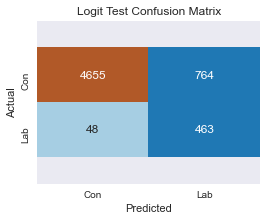

In [145]:
draw_cm(y_test,ytest_predict,"Logit Test Confusion Matrix")

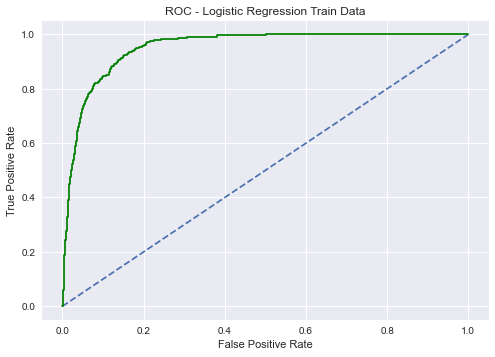

logit_test_auc 0.951906551890879


In [146]:
logit_test_auc, logit_test_fpr, logit_test_tpr = draw_auc_roc(logit_model, X_test, y_test, 'g', 'ROC - Logistic Regression Train Data')
print('logit_test_auc', logit_test_auc)

In [147]:
scores = cross_val_score(logit_model, X_train_res, y_train_res, cv=10)
scores

Fitting 10 folds for each of 160 candidates, totalling 1600 fits


[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done 1600 out of 1600 | elapsed: 27.6min finished


Fitting 10 folds for each of 160 candidates, totalling 1600 fits


[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done 1600 out of 1600 | elapsed: 27.5min finished


Fitting 10 folds for each of 160 candidates, totalling 1600 fits


[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done 1600 out of 1600 | elapsed: 31.1min finished


Fitting 10 folds for each of 160 candidates, totalling 1600 fits


[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done 1600 out of 1600 | elapsed: 29.9min finished


Fitting 10 folds for each of 160 candidates, totalling 1600 fits


[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done 1600 out of 1600 | elapsed: 26.3min finished


Fitting 10 folds for each of 160 candidates, totalling 1600 fits


[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done 1600 out of 1600 | elapsed: 25.1min finished


Fitting 10 folds for each of 160 candidates, totalling 1600 fits


[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done 1600 out of 1600 | elapsed: 25.4min finished


Fitting 10 folds for each of 160 candidates, totalling 1600 fits


[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done 1600 out of 1600 | elapsed: 53.5min finished


Fitting 10 folds for each of 160 candidates, totalling 1600 fits


[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.


KeyboardInterrupt: 

## Linear Discriminant Analysis

In [149]:
clf = LinearDiscriminantAnalysis()
grid_values = {'solver': ['svd', 'lsqr', 'eigen'],
               'tol': [0.0001, 0.001]
              }
LDA_model = GridSearchCV(clf, param_grid = grid_values, cv = 10, verbose=True)#, scoring = 'f1')
LDA_model.fit(X_train_res, y_train_res)

Fitting 10 folds for each of 6 candidates, totalling 60 fits


[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done  60 out of  60 | elapsed:   12.4s finished


GridSearchCV(cv=10, estimator=LinearDiscriminantAnalysis(),
             param_grid={'solver': ['svd', 'lsqr', 'eigen'],
                         'tol': [0.0001, 0.001]},
             verbose=True)

In [213]:
LDA_model.best_params_

{'solver': 'svd', 'tol': 0.0001}

In [214]:
ytrain_predict = LDA_model.predict(X_train_res)
ytest_predict = LDA_model.predict(X_test)

In [215]:
LDA_met,LDA_test_accu,LDA_test_precision,LDA_test_recall,LDA_test_f1 = performance_matrices(LDA_model, X_test, y_test, ytest_predict)
print ('LDA_test_accu ',LDA_test_accu)
print ('LDA_test_precision ',LDA_test_precision)
print ('LDA_test_recall ',LDA_test_recall)
print ('LDA_test_f1 ',LDA_test_f1)

LDA_test_accu  0.8
LDA_test_precision  0.99
LDA_test_recall  0.79
LDA_test_f1  0.88


In [216]:
LDA_met

,precision,recall,f1-score,support
0,0.991238,0.793320,0.881304,5419.000000
1,0.296924,0.925636,0.449620,511.000000
accuracy,0.804722,0.804722,0.804722,0.804722
macro avg,0.644081,0.859478,0.665462,5930.000000
weighted avg,0.931408,0.804722,0.844105,5930.000000


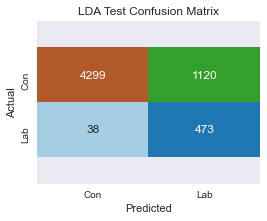

In [155]:
draw_cm(y_test,ytest_predict,"LDA Test Confusion Matrix")

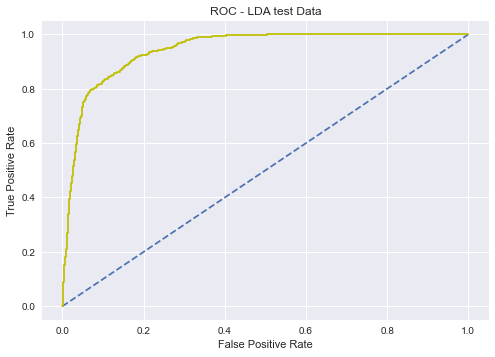

LDA_test_auc 0.9433456754501176


In [156]:
LDA_test_auc, LDA_test_fpr, LDA_test_tpr = draw_auc_roc(LDA_model, X_test, y_test, 'y', 'ROC - LDA test Data')
print('LDA_test_auc', LDA_test_auc)

## KNN Model

In [157]:
clf = KNeighborsClassifier()
grid_values = {'n_neighbors': range(5,10),
               'metric': ['minkowski', 'euclidean', 'canberra']
              }
KNN_model = GridSearchCV(clf, param_grid = grid_values, cv = 10, verbose=True)#, scoring = 'f1')
KNN_model.fit(X_train_res, y_train_res)

Fitting 10 folds for each of 15 candidates, totalling 150 fits


[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done 150 out of 150 | elapsed: 13.9min finished


GridSearchCV(cv=10, estimator=KNeighborsClassifier(),
             param_grid={'metric': ['minkowski', 'euclidean', 'canberra'],
                         'n_neighbors': range(5, 10)},
             verbose=True)

In [158]:
KNN_model.best_params_

{'metric': 'canberra', 'n_neighbors': 6}

In [159]:
ytrain_predict = KNN_model.predict(X_train_res)
ytest_predict = KNN_model.predict(X_test)

In [161]:
KNN_met,KNN_test_accu,KNN_test_precision,KNN_test_recall,KNN_test_f1 = performance_matrices(KNN_model, X_test, y_test, ytest_predict)
print ('KNN_test_accu ',KNN_test_accu)
print ('KNN_test_precision ',KNN_test_precision)
print ('KNN_test_recall ',KNN_test_recall)
print ('KNN_test_f1 ',KNN_test_f1)

KNN_test_accu  0.93
KNN_test_precision  0.98
KNN_test_recall  0.95
KNN_test_f1  0.96


In [162]:
KNN_met

,precision,recall,f1-score,support
0,0.975471,0.946669,0.960854,5419.000000
1,0.569300,0.747554,0.646362,511.000000
accuracy,0.929511,0.929511,0.929511,0.929511
macro avg,0.772385,0.847111,0.803608,5930.000000
weighted avg,0.940470,0.929511,0.933754,5930.000000


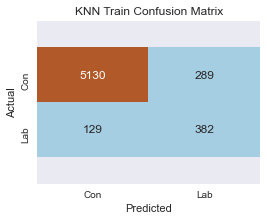

In [163]:
draw_cm(y_test,ytest_predict,"KNN Train Confusion Matrix")

## Bagging using RandomForest

In [166]:
from sklearn.ensemble import BaggingClassifier
from sklearn.ensemble import RandomForestClassifier

#rfcl = RandomForestClassifier(class_weight='balanced')
rfcl = RandomForestClassifier()
Bagging_model=BaggingClassifier(base_estimator=rfcl,n_estimators=20,random_state=1)
#Bagging_model.fit(X_train_res, y_train_res)
Bagging_model.fit(X_train, y_train)

BaggingClassifier(base_estimator=RandomForestClassifier(), n_estimators=20,
                  random_state=1)

In [167]:
#ytrain_predict = Bagging_model.predict(X_train_res)
ytrain_predict = Bagging_model.predict(X_train)
ytest_predict = Bagging_model.predict(X_test)

In [168]:
Bagging_met,Bagging_test_accu,Bagging_test_precision,Bagging_test_recall,Bagging_test_f1 = performance_matrices(Bagging_model, X_test, y_test, ytest_predict)
print ('Bagging_test_accu ',Bagging_test_accu)
print ('Bagging_test_precision ',Bagging_test_precision)
print ('Bagging_test_recall ',Bagging_test_recall)
print ('Bagging_test_f1 ',Bagging_test_f1)

Bagging_test_accu  0.97
Bagging_test_precision  0.97
Bagging_test_recall  1.0
Bagging_test_f1  0.98


In [169]:
Bagging_met

,precision,recall,f1-score,support
0,0.968750,0.995387,0.981888,5419.000000
1,0.930939,0.659491,0.772050,511.000000
accuracy,0.966442,0.966442,0.966442,0.966442
macro avg,0.949845,0.827439,0.876969,5930.000000
weighted avg,0.965492,0.966442,0.963806,5930.000000


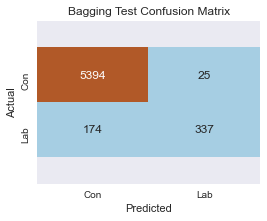

In [170]:
draw_cm(y_test,ytest_predict,"Bagging Test Confusion Matrix")

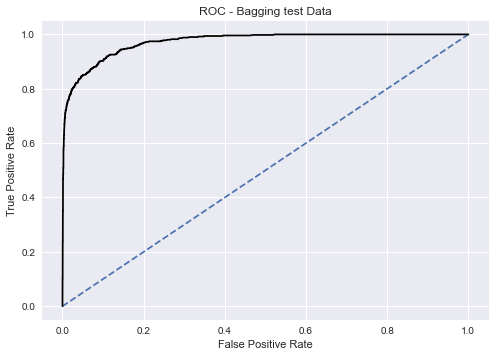

Bagging_test_auc 0.9729407545892921


In [171]:
Bagging_test_auc, Bagging_test_fpr, Bagging_test_tpr = draw_auc_roc(Bagging_model, X_test, y_test, 'k', 'ROC - Bagging test Data')
print('Bagging_test_auc', Bagging_test_auc)

## XGBoost

In [172]:
import xgboost as xgb
#grid_values = {'max_depth':[4,5,6],
#               'min_child_weight':[2,3,4]
#              }
#clf=xgb.XGBClassifier(learning_rate =0.01,
#                            n_estimators=1000,
#                            max_depth=5,
#                            min_child_weight=1,
#                            gamma=0,
#                            subsample=0.8,
#                            colsample_bytree=0.8,
#                            objective= 'binary:logistic',
#                            nthread=4,
#                            scale_pos_weight=1,
#                            seed = 27
#                           )

#XGB_model = GridSearchCV(clf, param_grid = grid_values, cv = 10, verbose=True)#, scoring = 'f1')
XGB_model = xgb.XGBClassifier(max_depth = 5,
                              min_child_weight = 3,
                              learning_rate =0.01,
                              n_estimators=1000,
                              #gamma=0,
                              #subsample=0.8,
                              #colsample_bytree=0.8,
                              #objective= 'binary:logistic',
                              #nthread=4,
                              #scale_pos_weight=1,
                              #seed = 27)
                             )
#XGB_model.fit(X_train_res, y_train_res)
XGB_model.fit(X_train, y_train)

[15:18:24] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.3.0/src/learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


XGBClassifier(base_score=0.5, booster='gbtree', colsample_bylevel=1,
              colsample_bynode=1, colsample_bytree=1, gamma=0, gpu_id=-1,
              importance_type='gain', interaction_constraints='',
              learning_rate=0.01, max_delta_step=0, max_depth=5,
              min_child_weight=3, missing=nan, monotone_constraints='()',
              n_estimators=1000, n_jobs=4, num_parallel_tree=1, random_state=0,
              reg_alpha=0, reg_lambda=1, scale_pos_weight=1, subsample=1,
              tree_method='exact', validate_parameters=1, verbosity=None)

In [173]:
ytrain_predict = XGB_model.predict(X_train)
ytest_predict = XGB_model.predict(X_test)

In [174]:
XGB_met,XGB_test_accu,XGB_test_precision,XGB_test_recall,XGB_test_f1 = performance_matrices(XGB_model, X_test, y_test, ytest_predict)
print ('XGB_test_accu ',XGB_test_accu)
print ('XGB_test_precision ',XGB_test_precision)
print ('XGB_test_recall ',XGB_test_recall)
print ('XGB_test_f1 ',XGB_test_f1)

XGB_test_accu  0.97
XGB_test_precision  0.97
XGB_test_recall  0.99
XGB_test_f1  0.98


In [175]:
XGB_met

,precision,recall,f1-score,support
0,0.973247,0.993541,0.983289,5419.00000
1,0.912060,0.710372,0.798680,511.00000
accuracy,0.969140,0.969140,0.969140,0.96914
macro avg,0.942653,0.851957,0.890985,5930.00000
weighted avg,0.967974,0.969140,0.967381,5930.00000


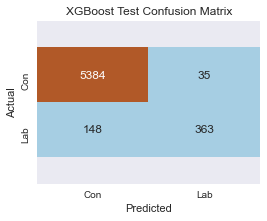

In [176]:
draw_cm(y_test,ytest_predict,"XGBoost Test Confusion Matrix")

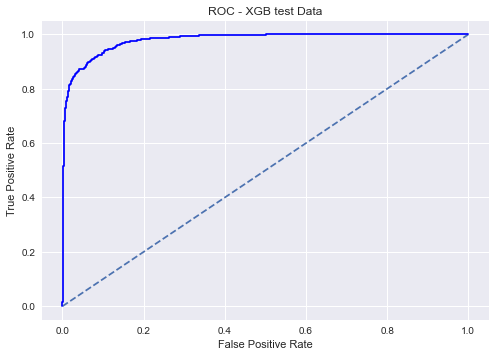

XGB_test_auc 0.9792554211481022


In [177]:
XGB_test_auc, XGB_test_fpr, XGB_test_tpr = draw_auc_roc(XGB_model, X_test, y_test, 'b', 'ROC - XGB test Data')
print('XGB_test_auc', XGB_test_auc)

## Gradient Boosting Classifier

In [222]:
from sklearn.ensemble import GradientBoostingClassifier
GBC_model = GradientBoostingClassifier(n_estimators = 500, max_depth = 10)
#GBC_model.fit(X_train_res, y_train_res)
GBC_model.fit(X_train, y_train)

GradientBoostingClassifier(max_depth=10, n_estimators=500)

In [179]:
ytrain_predict = XGB_model.predict(X_train)
ytest_predict = GBC_model.predict(X_test)

In [223]:
GBC_met,GBC_test_accu,GBC_test_precision,GBC_test_recall,GBC_test_f1 = performance_matrices(GBC_model, X_test, y_test, ytest_predict)
print ('GBC_test_accu ',GBC_test_accu)
print ('GBC_test_precision ',GBC_test_precision)
print ('GBC_test_recall ',GBC_test_recall)
print ('GBC_test_f1 ',GBC_test_f1)

GBC_test_accu  0.97
GBC_test_precision  0.99
GBC_test_recall  0.79
GBC_test_f1  0.88


In [224]:
GBC_met

,precision,recall,f1-score,support
0,0.991238,0.793320,0.881304,5419.000000
1,0.296924,0.925636,0.449620,511.000000
accuracy,0.804722,0.804722,0.804722,0.804722
macro avg,0.644081,0.859478,0.665462,5930.000000
weighted avg,0.931408,0.804722,0.844105,5930.000000


In [217]:
index=['Accuracy','AUC','Recall','Precision','F1 Score']
perf_data = pd.DataFrame({
                     'Logit Test':[logit_test_accu,logit_test_auc,logit_test_recall,logit_test_precision,logit_test_f1],
                     
                     'LDA Test':[LDA_test_accu,LDA_test_auc,LDA_test_recall,LDA_test_precision,LDA_test_f1],
                     
                     'KNN Test':[KNN_test_accu,KNN_test_auc,KNN_test_recall,KNN_test_precision,KNN_test_f1],
                                                             
                     'SVM Test':[SVM_test_accu,SVM_test_auc,SVM_test_recall,SVM_test_precision,SVM_test_f1],
                    
                     'Bagging Test':[Bagging_test_accu,Bagging_test_auc,Bagging_test_recall,Bagging_test_precision,Bagging_test_f1],
                     
                     'XGB Test':[XGB_test_accu,XGB_test_auc,XGB_test_recall,XGB_test_precision,XGB_test_f1]
                    },index=index)
round(perf_data,2)

,Logit Test,LDA Test,KNN Test,SVM Test,Bagging Test,XGB Test
Accuracy,0.86,0.80,0.93,0.96,0.97,0.97
AUC,0.95,0.94,0.91,0.96,0.97,0.98
Recall,0.86,0.79,0.95,1.00,1.00,0.99
Precision,0.99,0.99,0.98,0.97,0.97,0.97
F1 Score,0.92,0.88,0.96,0.98,0.98,0.98


(array([0.5, 1.5, 2.5, 3.5, 4.5]), <a list of 5 Text major ticklabel objects>)

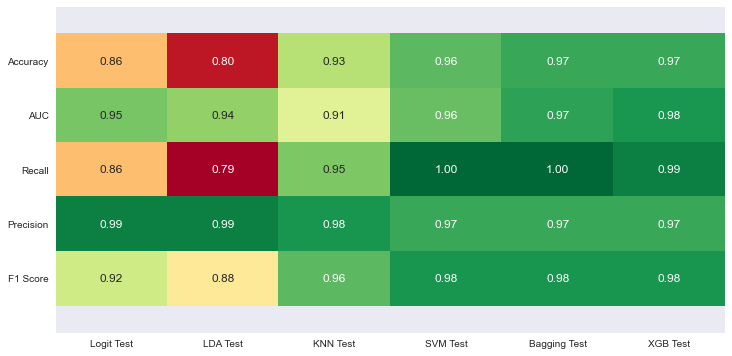

In [218]:
plt.subplots(figsize=(12,6))
ax = sns.heatmap(perf_data, cmap='RdYlGn', annot=True, fmt='.2f',annot_kws={"fontsize":12}, cbar = False)
bottom, top = ax.get_ylim()
ax.set_ylim (bottom + 0.5, top - 0.5)
plt.yticks(rotation=0) 

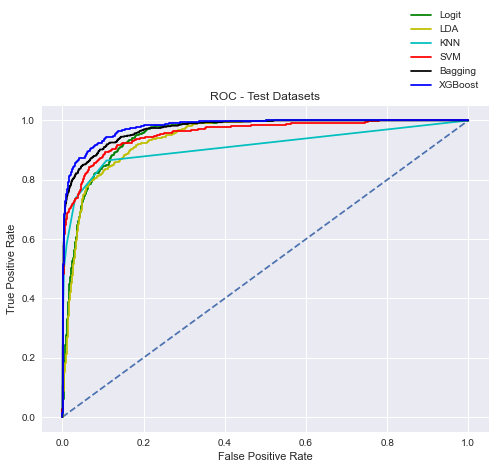

In [193]:
plt.figure(figsize=(8,6))
plt.plot([0, 1], [0, 1], linestyle='--')
plt.plot(logit_test_fpr, logit_test_tpr,color='g',label="Logit")
plt.plot(LDA_test_fpr,LDA_test_tpr,color='y',label="LDA")
plt.plot(KNN_test_fpr,KNN_test_tpr,color='c',label="KNN")
plt.plot(SVM_test_fpr,SVM_test_tpr,color='r',label="SVM")
plt.plot(Bagging_test_fpr,Bagging_test_tpr,color='k',label="Bagging")
plt.plot(XGB_test_fpr,XGB_test_tpr,color='b',label="XGBoost")
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC - Test Datasets')
plt.legend(bbox_to_anchor=(0., 1.02, 1., .102), loc='lower right')

## Building Neural Network Model

In [219]:
from sklearn.neural_network import MLPClassifier
clf = MLPClassifier(hidden_layer_sizes=100, max_iter=5000,
                     solver='sgd', verbose=True,  random_state=21,tol=0.01)
clf.fit(X_train, y_train)

Iteration 1, loss = 0.50473679
Iteration 2, loss = 0.32965809
Iteration 3, loss = 0.29193212
Iteration 4, loss = 0.27386556
Iteration 5, loss = 0.26198602
Iteration 6, loss = 0.25291623
Iteration 7, loss = 0.24563291
Iteration 8, loss = 0.23945063
Iteration 9, loss = 0.23405335
Iteration 10, loss = 0.22927753
Iteration 11, loss = 0.22492020
Iteration 12, loss = 0.22086975
Iteration 13, loss = 0.21715191
Iteration 14, loss = 0.21365914
Iteration 15, loss = 0.21040348
Iteration 16, loss = 0.20733214
Training loss did not improve more than tol=0.010000 for 10 consecutive epochs. Stopping.


MLPClassifier(hidden_layer_sizes=100, max_iter=5000, random_state=21,
              solver='sgd', tol=0.01, verbose=True)

In [221]:
y_pred = clf.predict(X_test)
print(confusion_matrix(y_test, y_pred))
clf.score(X_test,y_test)
print(classification_report(y_test, y_pred))

[[5389   30]
 [ 434   77]]
              precision    recall  f1-score   support

           0       0.93      0.99      0.96      5419
           1       0.72      0.15      0.25       511

    accuracy                           0.92      5930
   macro avg       0.82      0.57      0.60      5930
weighted avg       0.91      0.92      0.90      5930



## AdaBoostClassifier

In [225]:
from sklearn.ensemble import AdaBoostClassifier

clfADB = AdaBoostClassifier(n_estimators=100)
clfADB.fit(X_train,y_train)
y_pred=clfADB.predict(X_test)
model_scoreADB = clfADB.score(X_test, y_test)
print(model_scoreADB)
print(metrics.confusion_matrix(y_test, y_pred))
from sklearn import metrics
print(metrics.classification_report(y_test, y_pred))

0.9608768971332209
[[5360   59]
 [ 173  338]]
              precision    recall  f1-score   support

           0       0.97      0.99      0.98      5419
           1       0.85      0.66      0.74       511

    accuracy                           0.96      5930
   macro avg       0.91      0.83      0.86      5930
weighted avg       0.96      0.96      0.96      5930



## Lazy Predict

In [226]:
from lazypredict.Supervised import LazyClassifier, LazyRegressor
# fit all models
clf = LazyClassifier(predictions=True)
models, predictions = clf.fit(X_train, X_test, y_train, y_test)
print(models)

 90%|█████████████████████████████████████████████████████████████████████████▊        | 27/30 [01:10<00:05,  1.68s/it]

[12:53:26] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.3.0/src/learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


100%|██████████████████████████████████████████████████████████████████████████████████| 30/30 [01:13<00:00,  2.45s/it]

                               Accuracy  Balanced Accuracy  ROC AUC  F1 Score  \
Model                                                                           
LGBMClassifier                     0.97               0.88     0.88      0.97   
XGBClassifier                      0.97               0.87     0.87      0.97   
ExtraTreesClassifier               0.97               0.85     0.85      0.97   
BaggingClassifier                  0.97               0.84     0.84      0.96   
DecisionTreeClassifier             0.95               0.84     0.84      0.95   
RandomForestClassifier             0.97               0.83     0.83      0.96   
AdaBoostClassifier                 0.96               0.81     0.81      0.96   
ExtraTreeClassifier                0.94               0.81     0.81      0.94   
LabelPropagation                   0.94               0.81     0.81      0.94   
LabelSpreading                     0.95               0.81     0.81      0.94   
PassiveAggressiveClassifier 

## LightGBM Classifier

In [228]:
import lightgbm as lgb
clf = lgb.LGBMClassifier()
clf.fit(X_train, y_train)
y_pred=clf.predict(X_test)
from sklearn.metrics import classification_report
print(metrics.confusion_matrix(y_test, y_pred))
print(classification_report(y_test, y_pred))

[[5376   43]
 [ 119  392]]
              precision    recall  f1-score   support

           0       0.98      0.99      0.99      5419
           1       0.90      0.77      0.83       511

    accuracy                           0.97      5930
   macro avg       0.94      0.88      0.91      5930
weighted avg       0.97      0.97      0.97      5930



In [234]:
import lightgbm as lgb
import pprint
#Set the minimum error arbitrarily large
min = 99999999999999999999999 
count = 0 #Used for keeping track of the iteration number
#How many runs to perform using randomly selected hyperparameters
iterations = 50
for i in range(iterations):
    print('iteration number', count)
    count += 1 #increment count
    try:
        d_train = lgb.Dataset(X_train, label=y_train) #Load in data
        params = {} #initialize parameters
        params['learning_rate'] = np.random.uniform(0, 1)
        params['boosting_type'] = np.random.choice(['gbdt', 'dart', 'goss'])
        params['objective'] = 'regression'
        params['metric'] = 'mae'
        params['sub_feature'] = np.random.uniform(0, 1)
        params['num_leaves'] = np.random.randint(20, 300)
        params['min_data'] = np.random.randint(10, 100)
        params['max_depth'] = np.random.randint(5, 200)
        iterations = np.random.randint(10, 10000)
        print(params, iterations)
#Train using selected parameters
    clf = lgb.train(params, d_train, iterations)
    y_pred=clf.predict(X_test) #Create predictions on test set
    mae=mean_absolute_error(y_pred,y_test)
        print('MAE:', mae)
        if mae < min:
            min = mae
            pp = params 
        except: #in case something goes wrong
        print('failed with')
        print(params)
print("*" * 50)
print('Minimum is: ', min)
print('Used params', pp)

SyntaxError: invalid syntax (<ipython-input-234-209d924c5456>, line 25)

## CatBoost 

In [235]:
from catboost import CatBoostClassifier
catboost = CatBoostClassifier() 
catboost.fit(X_train, y_train)

from sklearn.metrics import confusion_matrix, accuracy_score
y_pred = catboost.predict(X_test)
cm = confusion_matrix(y_test, y_pred)
print(cm)
accuracy_score(y_test, y_pred)

Learning rate set to 0.031632
0:	learn: 0.6584195	total: 157ms	remaining: 2m 37s
1:	learn: 0.6099743	total: 172ms	remaining: 1m 25s
2:	learn: 0.5664703	total: 190ms	remaining: 1m 2s
3:	learn: 0.5255167	total: 214ms	remaining: 53.2s
4:	learn: 0.4912501	total: 229ms	remaining: 45.6s
5:	learn: 0.4648562	total: 246ms	remaining: 40.7s
6:	learn: 0.4455568	total: 259ms	remaining: 36.8s
7:	learn: 0.4279835	total: 276ms	remaining: 34.3s
8:	learn: 0.4059172	total: 292ms	remaining: 32.1s
9:	learn: 0.3755102	total: 307ms	remaining: 30.4s
10:	learn: 0.3632114	total: 323ms	remaining: 29s
11:	learn: 0.3478933	total: 337ms	remaining: 27.7s
12:	learn: 0.3371558	total: 354ms	remaining: 26.8s
13:	learn: 0.3261486	total: 369ms	remaining: 26s
14:	learn: 0.3144933	total: 389ms	remaining: 25.5s
15:	learn: 0.3046819	total: 403ms	remaining: 24.8s
16:	learn: 0.2972953	total: 425ms	remaining: 24.6s
17:	learn: 0.2847690	total: 441ms	remaining: 24s
18:	learn: 0.2723670	total: 459ms	remaining: 23.7s
19:	learn: 0.26

171:	learn: 0.0943323	total: 3.15s	remaining: 15.2s
172:	learn: 0.0940467	total: 3.17s	remaining: 15.2s
173:	learn: 0.0939162	total: 3.19s	remaining: 15.1s
174:	learn: 0.0937291	total: 3.2s	remaining: 15.1s
175:	learn: 0.0935814	total: 3.21s	remaining: 15.1s
176:	learn: 0.0934215	total: 3.23s	remaining: 15s
177:	learn: 0.0932690	total: 3.25s	remaining: 15s
178:	learn: 0.0931142	total: 3.26s	remaining: 15s
179:	learn: 0.0930238	total: 3.28s	remaining: 15s
180:	learn: 0.0928374	total: 3.3s	remaining: 14.9s
181:	learn: 0.0926617	total: 3.33s	remaining: 15s
182:	learn: 0.0925021	total: 3.35s	remaining: 14.9s
183:	learn: 0.0923793	total: 3.36s	remaining: 14.9s
184:	learn: 0.0922508	total: 3.37s	remaining: 14.9s
185:	learn: 0.0921388	total: 3.39s	remaining: 14.8s
186:	learn: 0.0920508	total: 3.4s	remaining: 14.8s
187:	learn: 0.0919059	total: 3.42s	remaining: 14.8s
188:	learn: 0.0916876	total: 3.43s	remaining: 14.7s
189:	learn: 0.0915773	total: 3.45s	remaining: 14.7s
190:	learn: 0.0914198	tot

335:	learn: 0.0748702	total: 5.93s	remaining: 11.7s
336:	learn: 0.0746890	total: 5.95s	remaining: 11.7s
337:	learn: 0.0746185	total: 5.96s	remaining: 11.7s
338:	learn: 0.0745516	total: 5.99s	remaining: 11.7s
339:	learn: 0.0744832	total: 6.02s	remaining: 11.7s
340:	learn: 0.0743984	total: 6.08s	remaining: 11.7s
341:	learn: 0.0743529	total: 6.11s	remaining: 11.8s
342:	learn: 0.0742139	total: 6.16s	remaining: 11.8s
343:	learn: 0.0741506	total: 6.18s	remaining: 11.8s
344:	learn: 0.0740640	total: 6.2s	remaining: 11.8s
345:	learn: 0.0739864	total: 6.21s	remaining: 11.7s
346:	learn: 0.0739003	total: 6.23s	remaining: 11.7s
347:	learn: 0.0738651	total: 6.25s	remaining: 11.7s
348:	learn: 0.0737926	total: 6.27s	remaining: 11.7s
349:	learn: 0.0737350	total: 6.29s	remaining: 11.7s
350:	learn: 0.0736775	total: 6.32s	remaining: 11.7s
351:	learn: 0.0736418	total: 6.33s	remaining: 11.7s
352:	learn: 0.0735701	total: 6.35s	remaining: 11.6s
353:	learn: 0.0733829	total: 6.39s	remaining: 11.7s
354:	learn: 0

505:	learn: 0.0626619	total: 8.87s	remaining: 8.66s
506:	learn: 0.0625685	total: 8.88s	remaining: 8.64s
507:	learn: 0.0625572	total: 8.9s	remaining: 8.62s
508:	learn: 0.0624532	total: 8.92s	remaining: 8.6s
509:	learn: 0.0623903	total: 8.93s	remaining: 8.58s
510:	learn: 0.0623266	total: 8.95s	remaining: 8.56s
511:	learn: 0.0622881	total: 8.96s	remaining: 8.54s
512:	learn: 0.0622013	total: 8.97s	remaining: 8.52s
513:	learn: 0.0621729	total: 8.99s	remaining: 8.5s
514:	learn: 0.0621432	total: 9s	remaining: 8.48s
515:	learn: 0.0620784	total: 9.02s	remaining: 8.46s
516:	learn: 0.0620040	total: 9.04s	remaining: 8.45s
517:	learn: 0.0619745	total: 9.05s	remaining: 8.43s
518:	learn: 0.0619490	total: 9.07s	remaining: 8.4s
519:	learn: 0.0618821	total: 9.08s	remaining: 8.38s
520:	learn: 0.0618432	total: 9.1s	remaining: 8.36s
521:	learn: 0.0618072	total: 9.11s	remaining: 8.34s
522:	learn: 0.0617677	total: 9.13s	remaining: 8.32s
523:	learn: 0.0617115	total: 9.14s	remaining: 8.3s
524:	learn: 0.0616707

665:	learn: 0.0542286	total: 11.8s	remaining: 5.92s
666:	learn: 0.0542005	total: 11.8s	remaining: 5.9s
667:	learn: 0.0541896	total: 11.8s	remaining: 5.88s
668:	learn: 0.0541451	total: 11.8s	remaining: 5.86s
669:	learn: 0.0541113	total: 11.9s	remaining: 5.84s
670:	learn: 0.0540645	total: 11.9s	remaining: 5.84s
671:	learn: 0.0540541	total: 11.9s	remaining: 5.82s
672:	learn: 0.0540172	total: 11.9s	remaining: 5.8s
673:	learn: 0.0539958	total: 12s	remaining: 5.78s
674:	learn: 0.0539231	total: 12s	remaining: 5.77s
675:	learn: 0.0538773	total: 12s	remaining: 5.75s
676:	learn: 0.0537869	total: 12s	remaining: 5.74s
677:	learn: 0.0537719	total: 12s	remaining: 5.72s
678:	learn: 0.0537224	total: 12.1s	remaining: 5.7s
679:	learn: 0.0536476	total: 12.1s	remaining: 5.68s
680:	learn: 0.0536078	total: 12.1s	remaining: 5.67s
681:	learn: 0.0535834	total: 12.1s	remaining: 5.65s
682:	learn: 0.0535172	total: 12.1s	remaining: 5.63s
683:	learn: 0.0534850	total: 12.2s	remaining: 5.62s
684:	learn: 0.0534395	tot

824:	learn: 0.0482128	total: 14.7s	remaining: 3.13s
825:	learn: 0.0481749	total: 14.8s	remaining: 3.11s
826:	learn: 0.0481214	total: 14.8s	remaining: 3.09s
827:	learn: 0.0480835	total: 14.8s	remaining: 3.07s
828:	learn: 0.0480584	total: 14.8s	remaining: 3.05s
829:	learn: 0.0479872	total: 14.8s	remaining: 3.04s
830:	learn: 0.0479722	total: 14.8s	remaining: 3.02s
831:	learn: 0.0479480	total: 14.9s	remaining: 3s
832:	learn: 0.0479344	total: 14.9s	remaining: 2.98s
833:	learn: 0.0479105	total: 14.9s	remaining: 2.96s
834:	learn: 0.0478748	total: 14.9s	remaining: 2.94s
835:	learn: 0.0478400	total: 14.9s	remaining: 2.93s
836:	learn: 0.0477771	total: 14.9s	remaining: 2.91s
837:	learn: 0.0477457	total: 15s	remaining: 2.89s
838:	learn: 0.0477387	total: 15s	remaining: 2.87s
839:	learn: 0.0477056	total: 15s	remaining: 2.85s
840:	learn: 0.0476336	total: 15s	remaining: 2.84s
841:	learn: 0.0475803	total: 15s	remaining: 2.82s
842:	learn: 0.0475246	total: 15s	remaining: 2.8s
843:	learn: 0.0475047	total:

986:	learn: 0.0427318	total: 17.5s	remaining: 230ms
987:	learn: 0.0427121	total: 17.5s	remaining: 212ms
988:	learn: 0.0426920	total: 17.5s	remaining: 195ms
989:	learn: 0.0426721	total: 17.5s	remaining: 177ms
990:	learn: 0.0426431	total: 17.5s	remaining: 159ms
991:	learn: 0.0426150	total: 17.5s	remaining: 141ms
992:	learn: 0.0425620	total: 17.6s	remaining: 124ms
993:	learn: 0.0425467	total: 17.6s	remaining: 106ms
994:	learn: 0.0425178	total: 17.6s	remaining: 88.4ms
995:	learn: 0.0424843	total: 17.6s	remaining: 70.7ms
996:	learn: 0.0424389	total: 17.6s	remaining: 53ms
997:	learn: 0.0424042	total: 17.6s	remaining: 35.3ms
998:	learn: 0.0423697	total: 17.6s	remaining: 17.7ms
999:	learn: 0.0423548	total: 17.7s	remaining: 0us
[[5385   34]
 [ 127  384]]


0.972849915682968

In [236]:
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.98      0.99      0.99      5419
           1       0.92      0.75      0.83       511

    accuracy                           0.97      5930
   macro avg       0.95      0.87      0.91      5930
weighted avg       0.97      0.97      0.97      5930



# Check Multicollinearity and Run Stats Model


In [636]:
from statsmodels.stats.outliers_influence import variance_inflation_factor

def calc_vif(X):

    # Calculating VIF
    vif = pd.DataFrame()
    vif["variables"] = X.columns
    vif["VIF"] = [variance_inflation_factor(X.values, i) for i in range(X.shape[1])]

    return(vif)

In [637]:
X = scaled_df.drop('FORECLOSURE', axis = 1)
calc_vif(X).sort_values(by = 'VIF', ascending = False)

,variables,VIF
0,NET_DISBURSED_AMT,136.004110
19,OUTSTANDING_PRINCIPAL,85.811872
6,CURRENT_INTEREST_RATE_MAX,47.699448
5,CURRENT_INTEREST_RATE,28.206492
4,ORIGNAL_INTEREST_RATE,26.082609
26,DUEDAY_15,19.328960
25,DUEDAY_5,19.268325
14,EXCESS_AVAILABLE,15.329485
13,EXCESS_ADJUSTED_AMT,13.959634
9,EMI_AMOUNT,9.747718


In [638]:
X = X.drop('NET_DISBURSED_AMT', axis = 1)
calc_vif(X).sort_values(by = 'VIF', ascending = False)

,variables,VIF
5,CURRENT_INTEREST_RATE_MAX,47.678717
4,CURRENT_INTEREST_RATE,28.206490
3,ORIGNAL_INTEREST_RATE,26.079319
25,DUEDAY_15,19.328373
24,DUEDAY_5,19.260558
13,EXCESS_AVAILABLE,15.220076
12,EXCESS_ADJUSTED_AMT,11.219174
8,EMI_AMOUNT,6.736730
10,MAX_EMI_AMOUNT,5.837118
18,OUTSTANDING_PRINCIPAL,5.335459


In [639]:
X = X.drop('CURRENT_INTEREST_RATE_MAX', axis = 1)
calc_vif(X).sort_values(by = 'VIF', ascending = False)

,variables,VIF
24,DUEDAY_15,19.327875
23,DUEDAY_5,19.257642
3,ORIGNAL_INTEREST_RATE,15.766651
12,EXCESS_AVAILABLE,15.204014
4,CURRENT_INTEREST_RATE,13.842229
11,EXCESS_ADJUSTED_AMT,11.211557
7,EMI_AMOUNT,6.734370
9,MAX_EMI_AMOUNT,5.833667
17,OUTSTANDING_PRINCIPAL,5.335427
0,ORIGNAL_TENOR,4.890354


In [640]:
X = X.drop('DUEDAY_15', axis = 1)
calc_vif(X).sort_values(by = 'VIF', ascending = False)

,variables,VIF
3,ORIGNAL_INTEREST_RATE,15.763483
12,EXCESS_AVAILABLE,15.197603
4,CURRENT_INTEREST_RATE,13.831259
11,EXCESS_ADJUSTED_AMT,11.208788
7,EMI_AMOUNT,6.733647
9,MAX_EMI_AMOUNT,5.820613
17,OUTSTANDING_PRINCIPAL,5.334638
0,ORIGNAL_TENOR,4.868417
1,CURRENT_TENOR,4.637659
10,LAST_RECEIPT_AMOUNT,4.030570


In [641]:
X = X.drop('ORIGNAL_INTEREST_RATE', axis = 1)
calc_vif(X).sort_values(by = 'VIF', ascending = False)

,variables,VIF
11,EXCESS_AVAILABLE,15.166058
10,EXCESS_ADJUSTED_AMT,11.178460
6,EMI_AMOUNT,6.732905
8,MAX_EMI_AMOUNT,5.813499
16,OUTSTANDING_PRINCIPAL,5.334602
0,ORIGNAL_TENOR,4.387898
9,LAST_RECEIPT_AMOUNT,4.027475
1,CURRENT_TENOR,3.957829
20,PRODUCT_STHL,3.625204
21,PRODUCT_STLAP,3.578339


In [642]:
X = X.drop('EXCESS_AVAILABLE', axis = 1)
calc_vif(X).sort_values(by = 'VIF', ascending = False)

,variables,VIF
6,EMI_AMOUNT,6.720889
15,OUTSTANDING_PRINCIPAL,5.331219
8,MAX_EMI_AMOUNT,4.879910
0,ORIGNAL_TENOR,4.383214
9,LAST_RECEIPT_AMOUNT,3.999635
1,CURRENT_TENOR,3.954563
19,PRODUCT_STHL,3.624710
20,PRODUCT_STLAP,3.578165
14,NUM_LOW_FREQ_TRANSACTIONS,2.852470
10,EXCESS_ADJUSTED_AMT,2.787646


In [643]:
X = X.drop('EMI_AMOUNT', axis = 1)
calc_vif(X).sort_values(by = 'VIF', ascending = False)

,variables,VIF
7,MAX_EMI_AMOUNT,4.870041
0,ORIGNAL_TENOR,4.333043
8,LAST_RECEIPT_AMOUNT,3.993562
1,CURRENT_TENOR,3.953225
18,PRODUCT_STHL,3.613737
19,PRODUCT_STLAP,3.578165
13,NUM_LOW_FREQ_TRANSACTIONS,2.852461
9,EXCESS_ADJUSTED_AMT,2.609944
17,PRODUCT_LAP,2.540492
2,COMPLETED_TENURE,2.379230


## Model 1: Logit

In [644]:
import statsmodels.formula.api as SM

In [645]:
f_1 = 'FORECLOSURE ~ MAX_EMI_AMOUNT + ORIGNAL_TENOR + LAST_RECEIPT_AMOUNT + CURRENT_TENOR + PRODUCT_STHL + PRODUCT_STLAP + NUM_LOW_FREQ_TRANSACTIONS + EXCESS_ADJUSTED_AMT + PRODUCT_LAP + COMPLETED_TENURE + CURRENT_INTEREST_RATE_CHANGES + NUM_EMI_CHANGES + CURRENT_INTEREST_RATE + PAID_INTEREST + PAID_PRINCIPAL + OUTSTANDING_PRINCIPAL + DPD + EMI_OS_AMOUNT + FOIR + NET_LTV + DUEDAY_5'

In [646]:
model_1 = SM.logit(formula = f_1, data=scaled_df).fit() #fit(method='bfgs')

         Current function value: 0.161018
         Iterations: 35


In [647]:
model_1.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                           Logit Regression Results                           
==============================================================================
Dep. Variable:            FORECLOSURE   No. Observations:                19765
Model:                          Logit   Df Residuals:                    19743
Method:                           MLE   Df Model:                           21
Date:                Sun, 17 Jan 2021   Pseudo R-squ.:                  0.4598
Time:                        11:41:21   Log-Likelihood:                -3182.5
converged:                      False   LL-Null:                       -5891.6
Covariance Type:            nonrobust   LLR p-value:                     0.000
=================================================================================================
                                    coef    std err          z      P>|z|      [0.025      0.975]
-------------------------------------------------------------------------------------------------
Intercept                        -8.4546    156.134     -0.054      0.957    -314.472     297.563
MAX_EMI_AMOUNT                -3.117e-05      0.126     -0.000      1.000      -0.248       0.247
ORIGNAL_TENOR                     0.8071      0.058     13.869      0.000       0.693       0.921
LAST_RECEIPT_AMOUNT               0.1565      0.090      1.735      0.083      -0.020       0.333
CURRENT_TENOR                    -1.0196      0.064    -15.873      0.000      -1.146      -0.894
PRODUCT_STHL                     -1.8980      0.062    -30.499      0.000      -2.020      -1.776
PRODUCT_STLAP                    -9.1966    368.299     -0.025      0.980    -731.049     712.656
NUM_LOW_FREQ_TRANSACTIONS        -0.2467      0.051     -4.838      0.000      -0.347      -0.147
EXCESS_ADJUSTED_AMT               0.0609      0.115      0.530      0.596      -0.165       0.287
PRODUCT_LAP                      -5.5589      0.600     -9.264      0.000      -6.735      -4.383
COMPLETED_TENURE                  0.4655      0.045     10.300      0.000       0.377       0.554
CURRENT_INTEREST_RATE_CHANGES    -1.0593      0.049    -21.557      0.000      -1.156      -0.963
NUM_EMI_CHANGES                   0.0135      0.043      0.314      0.754      -0.071       0.098
CURRENT_INTEREST_RATE             1.2515      0.058     21.559      0.000       1.138       1.365
PAID_INTEREST                     0.4972      0.095      5.223      0.000       0.311       0.684
PAID_PRINCIPAL                   -4.3796      1.156     -3.789      0.000      -6.645      -2.114
OUTSTANDING_PRINCIPAL            -0.0594      0.079     -0.747      0.455      -0.215       0.096
DPD                               0.0743      0.055      1.359      0.174      -0.033       0.182
EMI_OS_AMOUNT                    -0.4079      0.219     -1.860      0.063      -0.838       0.022
FOIR                              0.1800      0.038      4.748      0.000       0.106       0.254
NET_LTV                          -0.2001      0.036     -5.612      0.000      -0.270      -0.130
DUEDAY_5                         -0.2228      0.027     -8.232      0.000      -0.276      -0.170
=================================================================================================

Possibly complete quasi-separation: A fraction 0.43 of observations can be
perfectly predicted. This might indicate that there is complete
quasi-separation. In this case some parameters will not be identified.
"""

In [648]:
X = X.drop('MAX_EMI_AMOUNT', axis = 1)
calc_vif(X).sort_values(by = 'VIF', ascending = False)

,variables,VIF
0,ORIGNAL_TENOR,4.330595
1,CURRENT_TENOR,3.952432
17,PRODUCT_STHL,3.612695
18,PRODUCT_STLAP,3.577890
12,NUM_LOW_FREQ_TRANSACTIONS,2.852452
16,PRODUCT_LAP,2.540092
2,COMPLETED_TENURE,2.378716
8,EXCESS_ADJUSTED_AMT,2.342257
4,CURRENT_INTEREST_RATE_CHANGES,2.318380
11,NUM_EMI_CHANGES,2.285939


In [649]:
X = X.drop('ORIGNAL_TENOR', axis = 1)
calc_vif(X).sort_values(by = 'VIF', ascending = False)

,variables,VIF
16,PRODUCT_STHL,3.592963
17,PRODUCT_STLAP,3.575173
11,NUM_LOW_FREQ_TRANSACTIONS,2.852424
15,PRODUCT_LAP,2.450771
1,COMPLETED_TENURE,2.325663
3,CURRENT_INTEREST_RATE_CHANGES,2.284920
10,NUM_EMI_CHANGES,2.283739
7,EXCESS_ADJUSTED_AMT,2.267233
2,CURRENT_INTEREST_RATE,2.211859
13,PAID_INTEREST,2.102895


In [650]:
f_2 = 'FORECLOSURE ~ LAST_RECEIPT_AMOUNT + CURRENT_TENOR + PRODUCT_STHL + PRODUCT_STLAP + NUM_LOW_FREQ_TRANSACTIONS + EXCESS_ADJUSTED_AMT + PRODUCT_LAP + COMPLETED_TENURE + CURRENT_INTEREST_RATE_CHANGES + NUM_EMI_CHANGES + CURRENT_INTEREST_RATE + PAID_INTEREST + PAID_PRINCIPAL + OUTSTANDING_PRINCIPAL + DPD + EMI_OS_AMOUNT + FOIR + NET_LTV + DUEDAY_5'

In [651]:
model_2 = SM.logit(formula = f_2, data=scaled_df).fit() #fit(method='bfgs')

         Current function value: 0.166100
         Iterations: 35


In [652]:
model_2.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                           Logit Regression Results                           
==============================================================================
Dep. Variable:            FORECLOSURE   No. Observations:                19765
Model:                          Logit   Df Residuals:                    19745
Method:                           MLE   Df Model:                           19
Date:                Sun, 17 Jan 2021   Pseudo R-squ.:                  0.4428
Time:                        11:41:22   Log-Likelihood:                -3283.0
converged:                      False   LL-Null:                       -5891.6
Covariance Type:            nonrobust   LLR p-value:                     0.000
=================================================================================================
                                    coef    std err          z      P>|z|      [0.025      0.975]
-------------------------------------------------------------------------------------------------
Intercept                        -9.7869   1.82e+04     -0.001      1.000   -3.58e+04    3.57e+04
LAST_RECEIPT_AMOUNT               0.0309      0.043      0.719      0.472      -0.053       0.115
CURRENT_TENOR                    -0.3186      0.037     -8.686      0.000      -0.391      -0.247
PRODUCT_STHL                     -1.8134      0.061    -29.716      0.000      -1.933      -1.694
PRODUCT_STLAP                   -12.5981    4.3e+04     -0.000      1.000   -8.43e+04    8.43e+04
NUM_LOW_FREQ_TRANSACTIONS        -0.2333      0.051     -4.607      0.000      -0.333      -0.134
EXCESS_ADJUSTED_AMT               0.3312      0.097      3.410      0.001       0.141       0.522
PRODUCT_LAP                      -5.5367      0.605     -9.145      0.000      -6.723      -4.350
COMPLETED_TENURE                  0.5227      0.045     11.741      0.000       0.435       0.610
CURRENT_INTEREST_RATE_CHANGES    -1.0450      0.049    -21.246      0.000      -1.141      -0.949
NUM_EMI_CHANGES                  -0.0053      0.043     -0.124      0.901      -0.090       0.079
CURRENT_INTEREST_RATE             1.1397      0.056     20.264      0.000       1.029       1.250
PAID_INTEREST                     0.4525      0.098      4.594      0.000       0.259       0.645
PAID_PRINCIPAL                   -3.9550      1.145     -3.453      0.001      -6.200      -1.710
OUTSTANDING_PRINCIPAL            -0.0730      0.077     -0.946      0.344      -0.224       0.078
DPD                               0.0785      0.055      1.440      0.150      -0.028       0.185
EMI_OS_AMOUNT                    -0.4765      0.227     -2.097      0.036      -0.922      -0.031
FOIR                              0.1601      0.037      4.354      0.000       0.088       0.232
NET_LTV                          -0.1308      0.035     -3.780      0.000      -0.199      -0.063
DUEDAY_5                         -0.2194      0.027     -8.190      0.000      -0.272      -0.167
=================================================================================================

Possibly complete quasi-separation: A fraction 0.43 of observations can be
perfectly predicted. This might indicate that there is complete
quasi-separation. In this case some parameters will not be identified.
"""

In [653]:
f_3 = 'FORECLOSURE ~ CURRENT_TENOR + PRODUCT_STHL + NUM_LOW_FREQ_TRANSACTIONS + EXCESS_ADJUSTED_AMT + PRODUCT_LAP + COMPLETED_TENURE + CURRENT_INTEREST_RATE_CHANGES + CURRENT_INTEREST_RATE + PAID_INTEREST + PAID_PRINCIPAL + EMI_OS_AMOUNT + FOIR + NET_LTV + DUEDAY_5'

In [654]:
model_3 = SM.logit(formula = f_3, data=scaled_df).fit()

Optimization terminated successfully.
         Current function value: 0.226529
         Iterations 15


In [655]:
model_3.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                           Logit Regression Results                           
==============================================================================
Dep. Variable:            FORECLOSURE   No. Observations:                19765
Model:                          Logit   Df Residuals:                    19750
Method:                           MLE   Df Model:                           14
Date:                Sun, 17 Jan 2021   Pseudo R-squ.:                  0.2401
Time:                        11:41:22   Log-Likelihood:                -4477.4
converged:                       True   LL-Null:                       -5891.6
Covariance Type:            nonrobust   LLR p-value:                     0.000
=================================================================================================
                                    coef    std err          z      P>|z|      [0.025      0.975]
-------------------------------------------------------------------------------------------------
Intercept                        -7.6856      0.813     -9.450      0.000      -9.280      -6.092
CURRENT_TENOR                    -0.0199      0.034     -0.589      0.556      -0.086       0.046
PRODUCT_STHL                     -0.1465      0.035     -4.185      0.000      -0.215      -0.078
NUM_LOW_FREQ_TRANSACTIONS        -0.2833      0.033     -8.497      0.000      -0.349      -0.218
EXCESS_ADJUSTED_AMT               0.4788      0.089      5.374      0.000       0.304       0.653
PRODUCT_LAP                      -8.4104      1.225     -6.865      0.000     -10.811      -6.009
COMPLETED_TENURE                  0.5573      0.041     13.651      0.000       0.477       0.637
CURRENT_INTEREST_RATE_CHANGES    -0.4601      0.042    -10.845      0.000      -0.543      -0.377
CURRENT_INTEREST_RATE            -0.2345      0.035     -6.682      0.000      -0.303      -0.166
PAID_INTEREST                     0.8520      0.099      8.621      0.000       0.658       1.046
PAID_PRINCIPAL                   -4.2878      1.065     -4.026      0.000      -6.375      -2.200
EMI_OS_AMOUNT                    -0.0930      0.077     -1.202      0.229      -0.244       0.059
FOIR                              0.4281      0.033     12.786      0.000       0.362       0.494
NET_LTV                          -0.0896      0.031     -2.854      0.004      -0.151      -0.028
DUEDAY_5                         -0.3792      0.023    -16.468      0.000      -0.424      -0.334
=================================================================================================

Possibly complete quasi-separation: A fraction 0.31 of observations can be
perfectly predicted. This might indicate that there is complete
quasi-separation. In this case some parameters will not be identified.
"""

In [656]:
f_4 = 'FORECLOSURE ~ PRODUCT_STHL + NUM_LOW_FREQ_TRANSACTIONS + EXCESS_ADJUSTED_AMT + PRODUCT_LAP + COMPLETED_TENURE + CURRENT_INTEREST_RATE_CHANGES + CURRENT_INTEREST_RATE + PAID_INTEREST + PAID_PRINCIPAL + FOIR + NET_LTV + DUEDAY_5'

In [657]:
model_4 = SM.logit(formula = f_4, data=scaled_df).fit()

Optimization terminated successfully.
         Current function value: 0.226591
         Iterations 15


In [658]:
model_4.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                           Logit Regression Results                           
==============================================================================
Dep. Variable:            FORECLOSURE   No. Observations:                19765
Model:                          Logit   Df Residuals:                    19752
Method:                           MLE   Df Model:                           12
Date:                Sun, 17 Jan 2021   Pseudo R-squ.:                  0.2398
Time:                        11:41:23   Log-Likelihood:                -4478.6
converged:                       True   LL-Null:                       -5891.6
Covariance Type:            nonrobust   LLR p-value:                     0.000
=================================================================================================
                                    coef    std err          z      P>|z|      [0.025      0.975]
-------------------------------------------------------------------------------------------------
Intercept                        -7.6441      0.826     -9.257      0.000      -9.262      -6.026
PRODUCT_STHL                     -0.1474      0.035     -4.213      0.000      -0.216      -0.079
NUM_LOW_FREQ_TRANSACTIONS        -0.2917      0.033     -8.925      0.000      -0.356      -0.228
EXCESS_ADJUSTED_AMT               0.4730      0.091      5.197      0.000       0.295       0.651
PRODUCT_LAP                      -8.3523      1.244     -6.715      0.000     -10.790      -5.914
COMPLETED_TENURE                  0.5617      0.040     13.890      0.000       0.482       0.641
CURRENT_INTEREST_RATE_CHANGES    -0.4621      0.042    -10.920      0.000      -0.545      -0.379
CURRENT_INTEREST_RATE            -0.2298      0.034     -6.763      0.000      -0.296      -0.163
PAID_INTEREST                     0.8350      0.096      8.680      0.000       0.646       1.024
PAID_PRINCIPAL                   -4.0850      1.048     -3.897      0.000      -6.139      -2.030
FOIR                              0.4269      0.033     12.759      0.000       0.361       0.493
NET_LTV                          -0.0950      0.031     -3.076      0.002      -0.156      -0.034
DUEDAY_5                         -0.3775      0.023    -16.418      0.000      -0.423      -0.332
=================================================================================================

Possibly complete quasi-separation: A fraction 0.31 of observations can be
perfectly predicted. This might indicate that there is complete
quasi-separation. In this case some parameters will not be identified.
"""

In [659]:
y_prob_pred_train = model_4.predict(fcl_train)

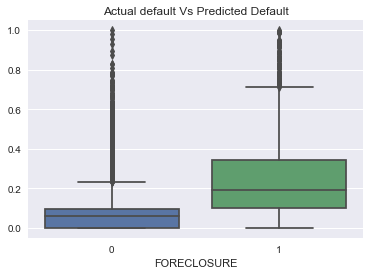

In [660]:
plt.figure(figsize=(6,4))
sns.boxplot(x=scaled_df['FORECLOSURE'],y=y_prob_pred_train)
plt.title('Actual default Vs Predicted Default')
plt.show()

In [661]:
y_class_pred=[]
for i in range(0,len(y_prob_pred_train)):
    if np.array(y_prob_pred_train)[i]>0.5:
        a=1
    else:
        a=0
    y_class_pred.append(a)

In [662]:
from sklearn import metrics
def draw_cm(actual, predicted):
    cm = metrics.confusion_matrix(actual, predicted, [0,1]) 
    #cm = metrics.confusion_matrix(actual, predicted)
    plt.subplots(figsize=(4,3))
    ax = sns.heatmap(cm, cmap = 'Paired', annot=True, fmt='.0f',annot_kws={"fontsize":12}, cbar = False)
    bottom, top = ax.get_ylim()
    ax.set_ylim (bottom + 0.5, top - 0.5)
    plt.yticks(rotation=0)
    plt.ylabel('Actual')
    plt.xlabel('Predicted')
    plt.show()

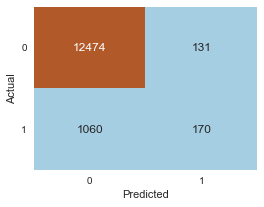

In [663]:
draw_cm(fcl_train['FORECLOSURE'], y_class_pred)

In [664]:
print(metrics.classification_report(fcl_train['FORECLOSURE'],y_class_pred,digits=3))

              precision    recall  f1-score   support

           0      0.922     0.990     0.954     12605
           1      0.565     0.138     0.222      1230

    accuracy                          0.914     13835
   macro avg      0.743     0.564     0.588     13835
weighted avg      0.890     0.914     0.889     13835



In [665]:
from sklearn.metrics import roc_auc_score,roc_curve
fpr, tpr, thresholds = roc_curve(fcl_train['FORECLOSURE'],y_prob_pred_train)

In [666]:
optimal_idx = np.argmax(tpr - fpr)
optimal_threshold = thresholds[optimal_idx]
optimal_threshold

0.11107930967053162

In [667]:
y_class_pred=[]
for i in range(0,len(y_prob_pred_train)):
    if np.array(y_prob_pred_train)[i]>0.11:
        a=1
    else:
        a=0
    y_class_pred.append(a)

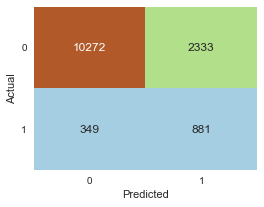

In [668]:
draw_cm(fcl_train['FORECLOSURE'], y_class_pred)

In [669]:
def performance_matrices(model, X_data, y_data, y_predicted):
    accuracy = round(model.score(X_data,y_data),2)
    metrics=classification_report(y_data, y_predicted,output_dict=True)
    met_df=pd.DataFrame(metrics).transpose()
    # Keeping the performance matrices of minority class
    precision=round(met_df.loc["1"][0],2)
    recall=round(met_df.loc["1"][1],2)
    f1=round(met_df.loc["1"][2],2)
    return (met_df, accuracy,precision,recall,f1);

In [670]:
print(metrics.classification_report(fcl_train['FORECLOSURE'],y_class_pred,digits=3))

              precision    recall  f1-score   support

           0      0.967     0.815     0.885     12605
           1      0.274     0.716     0.396      1230

    accuracy                          0.806     13835
   macro avg      0.621     0.766     0.641     13835
weighted avg      0.906     0.806     0.841     13835



### Validating on test data

In [671]:
y_prob_pred_test = model_4.predict(fcl_test)

In [672]:
y_class_pred=[]
for i in range(0,len(y_prob_pred_test)):
    if np.array(y_prob_pred_test)[i]>0.11:
        a=1
    else:
        a=0
    y_class_pred.append(a)

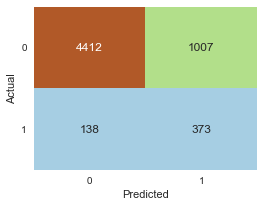

In [673]:
draw_cm(fcl_test['FORECLOSURE'], y_class_pred)

In [674]:
print(metrics.classification_report(fcl_test['FORECLOSURE'],y_class_pred,digits=3))

              precision    recall  f1-score   support

           0      0.970     0.814     0.885      5419
           1      0.270     0.730     0.395       511

    accuracy                          0.807      5930
   macro avg      0.620     0.772     0.640      5930
weighted avg      0.909     0.807     0.843      5930



In [675]:
conf_met=metrics.classification_report(fcl_test['FORECLOSURE'],y_class_pred,digits=3,output_dict=True)
met_df=pd.DataFrame(conf_met).transpose()
logit_test_prec=round(met_df.loc["1"][0],2)
logit_test_rec=round(met_df.loc["1"][1],2)
logit_test_f1=round(met_df.loc["1"][2],2)
logit_test_accu=round(met_df.loc["accuracy"][0],2)

In [676]:
met_df

,precision,recall,f1-score,support
0,0.969670,0.814172,0.885144,5419.000000
1,0.270290,0.729941,0.394500,511.000000
accuracy,0.806914,0.806914,0.806914,0.806914
macro avg,0.619980,0.772057,0.639822,5930.000000
weighted avg,0.909403,0.806914,0.842864,5930.000000


In [677]:
print('logit_test_prec :', logit_test_prec)
print('logit_test_rec :', logit_test_rec)
print('logit_test_f1 :', logit_test_f1)
print('logit_test_accu :', logit_test_accu)

logit_test_prec : 0.27
logit_test_rec : 0.73
logit_test_f1 : 0.39
logit_test_accu : 0.81


In [678]:
def draw_auc_roc(model, X_data, y_data, line_color, title):
    probs = model.predict(X_data)
    #probs = probs[:, 1]
    model_auc = roc_auc_score(y_data, probs)
    model_fpr, model_tpr, thresholds = roc_curve(y_data, probs)
    plt.figure(figsize=(6,4))
    plt.plot([0, 1], [0, 1], linestyle='--')
    plt.plot(model_fpr, model_tpr, color = line_color, label = 'ROC Curve (AUC: %0.2f)'%model_auc)
    plt.xlabel('False Positive Rate')
    plt.ylabel('True Positive Rate')
    plt.title(title)
    plt.legend(loc="lower right")
    # show the plot
    plt.show()
    return model_auc, model_fpr, model_tpr;

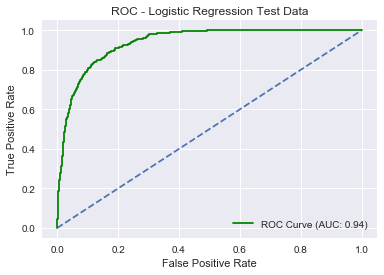

logit_test_auc 0.9380515537669336


In [679]:
logit_test_auc, logit_test_fpr, logit_test_tpr = draw_auc_roc(model_1, X_test, y_test, 'green', 'ROC - Logistic Regression Test Data')
print('logit_test_auc', logit_test_auc)

### Sklearn Logit model

In [680]:
from sklearn.linear_model import LogisticRegression

logit_model = LogisticRegression()
logit_model.fit(X_train, y_train)

LogisticRegression()

In [681]:
ytrain_predict = logit_model.predict(X_train)
ytest_predict = logit_model.predict(X_test)

In [682]:
ytest_predict_prob=logit_model.predict_proba(X_test)
pd.DataFrame(ytest_predict_prob).sample(10)

,0,1
2472,0.999999,0.000001
4415,0.988809,0.011191
267,0.999380,0.000620
4627,0.965569,0.034431
1968,0.837154,0.162846
1599,0.843748,0.156252
3673,0.999965,0.000035
115,0.513942,0.486058
2957,0.940982,0.059018
3691,0.994845,0.005155


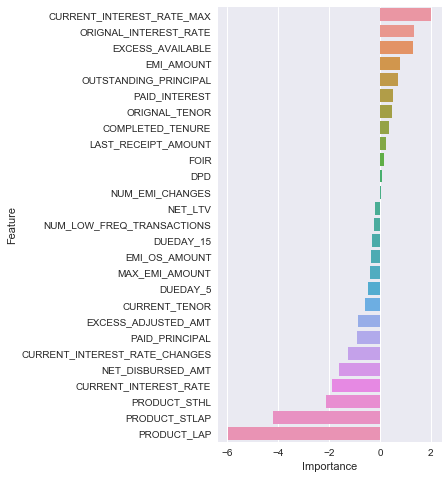

In [683]:
feature_rank = pd.DataFrame({'Feature' : X_train.columns,'Importance' : logit_model.coef_[0]})
feature_rank = feature_rank.sort_values('Importance', ascending=False )
plt.figure(figsize=(4,8))
sns.barplot(y='Feature', x='Importance', data=feature_rank)

In [684]:
conf_met=metrics.classification_report(y_train,ytrain_predict,digits=3,output_dict=True)
met_df=pd.DataFrame(conf_met).transpose()
logit_test_prec=round(met_df.loc["1"][0],2)
logit_test_rec=round(met_df.loc["1"][1],2)
logit_test_f1=round(met_df.loc["1"][2],2)
logit_test_accu=round(met_df.loc["accuracy"][0],2)

In [685]:
print('logit_test_prec :', logit_test_prec)
print('logit_test_rec :', logit_test_rec)
print('logit_test_f1 :', logit_test_f1)
print('logit_test_accu :', logit_test_accu)

logit_test_prec : 0.75
logit_test_rec : 0.5
logit_test_f1 : 0.6
logit_test_accu : 0.94


In [690]:
y_class_pred=[]
for i in range(0,len(ytrain_predict)):
    if np.array(ytrain_predict)[i]>0.11:
        a=1
    else:
        a=0
    y_class_pred.append(a)

In [693]:

print(metrics.classification_report(y_train,y_class_pred,digits=3))

              precision    recall  f1-score   support

           0      0.952     0.983     0.968     12605
           1      0.745     0.497     0.596      1230

    accuracy                          0.940     13835
   macro avg      0.849     0.740     0.782     13835
weighted avg      0.934     0.940     0.935     13835

